In [12]:
from sqlalchemy import Column, Integer, String, ForeignKey, create_engine, DateTime, func, Text, select
from sqlalchemy import Float, Boolean
from sqlalchemy.orm import declarative_base, Session, relationship, sessionmaker, configure_mappers
from datetime import datetime, timezone
from typing import List, Tuple, Dict
import pandas as pd
from IPython.display import display, HTML
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

# DataBase

## Describe tables

In [13]:
Base = declarative_base()

class Incident(Base):
    
    """
    Basic table "Incident":
    
    Columns:
    Columns:
    iyear - Year when the incident occurred
    imonth - Month when the incident occurred (1-12, 0 if unknown)
    iday - Day when the incident occurred (1-31, 0 if unknown)
    city_id - Reference to the city where the incident took place
    type_incident_id - Type of the incident (e.g., bombing, armed assault)
    type_attack_id - Method of attack used in the incident
    target_sub_type_id - Specific type of target affected by the incident
    corp_id - ID of the corporation or organization involved (if applicable)
    target_id - Reference to the main target of the incident
    natlty_id - Nationality of the target affected by the incident
    claimmode_id - Mode of claim responsibility (e.g., official statement, media)
    weapon_sub_type_id - Specific type of weapon used in the incident
    propextent_id - Extent of property damage caused by the incident
    """
    __tablename__ = 'incident'
    
    id = Column(Integer, primary_key=True)  
    iyear = Column(Integer, nullable=False)
    imonth = Column(Integer, nullable=False)
    iday = Column(Integer, nullable=False)
    city_id = Column(Integer, ForeignKey('city.id'))
    type_incident_id = Column(Integer, ForeignKey('type_incident.id'))
    type_attack_id = Column(Integer, ForeignKey('type_attack.id'))
    target_sub_type_id = Column(Integer, ForeignKey('target_sub_type.id'))
    corp_id = Column(Integer, ForeignKey('corp.id'))
    target_id = Column(Integer, ForeignKey('target.id'))
    natlty_id = Column(Integer, ForeignKey('natlty.id'))
    claimmode_id = Column(Integer, ForeignKey('claimmode.id'))
    weapon_sub_type_id = Column(Integer, ForeignKey('weapon_sub_type.id')) 
    propextent_id = Column(Integer, ForeignKey('propextent.id'))
    gsubname_id = Column(Integer, ForeignKey('gsubname.id'))

    city = relationship(lambda:City, back_populates="incident")
    place_spec = relationship(lambda:PlaceSpec, back_populates="incident", uselist=False)
    attack_spec = relationship(lambda:AttackSpec, back_populates="incident", uselist=False)
    type_incident = relationship(lambda:Type_Incident, back_populates="incident")
    type_attack = relationship(lambda:Type_Attack, back_populates="incident")
    target_sub_type = relationship(lambda:Target_Sub_Type, back_populates="incident")
    corp = relationship(lambda:Corp, back_populates="incident")
    target = relationship(lambda:Target, back_populates="incident")
    natlty = relationship(lambda:Natlty, back_populates="incident")
    claimmode = relationship(lambda:Claimmode, back_populates="incident") 
    weapon_sub_type = relationship(lambda:Weapon_Sub_Type, back_populates="incident") 
    propextent = relationship(lambda:Propextent, back_populates="incident") 
    victims = relationship(lambda:Victims, back_populates="incident")
    properties = relationship(lambda:Properties, back_populates="incident")
    hostages = relationship(lambda:Hostages, back_populates="incident")
    international_data = relationship(lambda:International_Data, back_populates="incident")
    other_data = relationship(lambda:Other_Data, back_populates="incident")
    gsubname = relationship(lambda:Gsubname, back_populates="incident")


class Country(Base):

    """
    table "Country":

    Columns:
    country_txt - name of the country
    """
    
    __tablename__ = 'country'
    id = Column(Integer, primary_key=True)
    country_txt = Column(String, nullable=False)

    region = relationship(lambda:Region, back_populates="country")

class Region(Base):
    
    """
    table "Region":

    Columns:
    region_txt - name of the region
    country_id - id country
    """
    
    __tablename__ = 'region'
    id = Column(Integer, primary_key=True)
    region_txt = Column(String, nullable=False)
    country_id = Column(Integer, ForeignKey('country.id'))

    city = relationship(lambda:City, back_populates="region")
    country = relationship(lambda:Country, back_populates="region")

class City(Base):
    
    """
    table "City":

    Columns:
    city - name of the city
    region_id - id region
    """
    
    __tablename__ = 'city'
    id = Column(Integer, primary_key=True)
    city = Column(String, nullable=False)
    region_id = Column(Integer, ForeignKey('region.id'))

    incident = relationship(lambda:Incident, back_populates="city")
    region = relationship(lambda:Region, back_populates="city")

class PlaceSpec(Base):

    """
    table "PlaceSpec":

    Columns:
    latitude - latitude
    longitude - longitude
    specificity -  Level of specificity of the location
    vicinity - Whether the attack occurred in the immediate vicinity (True/False/Unknown)
    location - Detailed location description
    summary - Brief summary of the incident
    motive - tated or suspected motive for the attack
    incident_id -  id in base table Incident
    """

    __tablename__ = 'place_spec'
    id = Column(Integer, primary_key=True)
    latitude = Column(Float)
    longitude = Column(Float)
    specificity = Column(Integer)
    vicinity = Column(Boolean, nullable=True)  # Допускаем NaN из CSV
    location = Column(String)
    summary = Column(Text)
    motive = Column(Text)

    incident_id = Column(Integer, ForeignKey('incident.id'))
    incident = relationship(lambda:Incident, back_populates="place_spec")

class AttackSpec(Base):

    """
    table "AttackSpec":

    Columns:
    crit1 - Political, economic, religious, or social goal
    crit2 - Evidence of intention to coerce, intimidate, or convey a message
    crit3 -  Action outside the context of legitimate warfare
    doubtterr - Whether there is doubt that the incident was terrorism
    multiple - Whether multiple attacks were part of the same incident
    success - Whether the attack was successful
    suicide - Whether it was a suicide attack
    incident_id -  id in base table Incident
    """

    __tablename__ = 'attack_spec'
    id = Column(Integer, primary_key=True)
    crit1 = Column(Boolean, nullable=True)
    crit2 = Column(Boolean, nullable=True)
    crit3 = Column(Boolean, nullable=True)
    doubtterr = Column(Boolean, nullable=True)
    multiple = Column(Boolean, nullable=True)
    success = Column(Boolean, nullable=True)
    suicide = Column(Boolean, nullable=True)

    incident_id = Column(Integer, ForeignKey('incident.id'))
    incident = relationship(lambda:Incident, back_populates="attack_spec")

class Victims(Base):

    """
    table "Victims":

    Columns:
    nkill - Total number of people killed
    nkillus - number of U.S. citizens killed
    nkillter -  Number of perpetrators killed
    nwound - Total number of people wounded
    nwoundus - Number of U.S. citizens wounded
    nwoundte - Number of perpetrators wounded
    incident_id -  id in base table Incident
    """

    __tablename__ = 'victims'
    id = Column(Integer, primary_key=True)
    nkill = Column(Integer)
    nkillus = Column(Integer)
    nkillter = Column(Integer)
    nwound = Column(Integer)
    nwoundus = Column(Integer)
    nwoundte = Column(Integer)
    
    incident_id = Column(Integer, ForeignKey('incident.id'))
    incident = relationship(lambda:Incident, back_populates="victims")

class Properties(Base):

    """
    table "Properties":

    Columns:
    property_ - Whether property damage occurred
    propvalue - Estimated property damage value
    propcomment -  Additional comments on property damage
    incident_id -  id in base table Incident
    """
    
    __tablename__ = 'properties'
    id = Column(Integer, primary_key=True)
    property_ = Column(Boolean, nullable=False)
    propvalue = Column(Integer, nullable=False)
    propcomment = Column(Text, nullable=False)

    incident_id = Column(Integer, ForeignKey('incident.id'))
    incident = relationship(lambda:Incident, back_populates="properties")

class Hostages(Base):
    
    """
    table "Hostages":

    Columns:
    ishostkid - Whether hostages/kidnapping occurred
    nhostkid - Number of hostages/kidnapped victims
    nhostkidus -  Number of U.S. hostages/kidnapped victims
    ndays - Duration of hostage situation (days)
    ransom - Whether ransom was demanded
    ransomamt - Amount of ransom demanded
    ransompaid - Amount of ransom paid
    hostkidoutcome_txt - Outcome of the hostage/kidnapping event
    incident_id -  id in base table Incident
    """
    
    __tablename__ = 'hostages'
    id = Column(Integer, primary_key=True)
    ishostkid = Column(Boolean, nullable=False)
    nhostkid = Column(Integer)
    nhostkidus = Column(Integer)
    ndays = Column(Integer)
    ransom = Column(Boolean)
    ransomamt = Column(Integer)
    ransompaid = Column(Integer)
    hostkidoutcome_txt = Column(String, nullable=False)

    incident_id = Column(Integer, ForeignKey('incident.id'))

    incident = relationship(lambda:Incident, back_populates="hostages")

class International_Data(Base):

    """
    table "International_Data":

    Columns:
    INT_LOG - International logistically-related terrorism indicator
    INT_IDEO - International ideological-related terrorism indicator
    INT_MISC -  International miscellaneous terrorism indicator
    INT_ANY - Whether any international connection exists
    incident_id -  id in base table Incident
    """
    
    __tablename__ = 'international_data'
    id = Column(Integer, primary_key=True)
    INT_LOG = Column(Boolean, nullable=False)
    INT_IDEO = Column(Boolean, nullable=False)
    INT_MISC = Column(Boolean, nullable=False)
    INT_ANY = Column(Boolean, nullable=False)

    incident_id = Column(Integer, ForeignKey('incident.id'))
    incident = relationship(lambda:Incident, back_populates="international_data")

class Type_Incident(Base):

    """
    table "Type_Incident":

    Columns:
    alternative_txt - Alternative description of the incident
    """
    
    __tablename__ = 'type_incident'
    
    id = Column(Integer, primary_key=True)   # заполняется из alternative
    alternative_txt = Column(String, nullable=False)

    incident = relationship(lambda:Incident, back_populates="type_incident")
    
class Type_Attack(Base):
    
    """
    table "Type_Incident":

    Columns:
    attacktype1_txt - Primary attack type description
    """
    
    __tablename__ = 'type_attack'
    
    id = Column(Integer, primary_key=True)   # заполняется из attacktype1
    attacktype1_txt = Column(String, nullable=False)

    incident = relationship(lambda:Incident, back_populates="type_attack")

class Target_Type(Base):

    """
    table "Target_Type":

    Columns:
    targtype1_txt - General target type description
    """
    
    __tablename__ = 'target_type'
    
    id = Column(Integer, primary_key=True)   # заполняется из targtype1
    targtype1_txt = Column(String, nullable=False)

    target_sub_type = relationship(lambda:Target_Sub_Type, back_populates="target_type")


class Target_Sub_Type(Base):

    """
    table "Target_Sub_Type":

    Columns:
    targsubtype1_txt - Specific target subtype description
    target_type_id - id in Target_Type
    """
    
    __tablename__ = 'target_sub_type'
    
    id = Column(Integer, primary_key=True)   # заполняется из targsubtype1
    targsubtype1_txt = Column(String, nullable=False)

    target_type_id = Column(Integer, ForeignKey('target_type.id'))
    target_type = relationship(lambda:Target_Type, back_populates="target_sub_type")
    incident = relationship(lambda:Incident, back_populates="target_sub_type")

class Corp(Base):

    """
    table "Corp":

    Columns:
    corp1 - Name of the corporation or organization targeted
    """
    
    __tablename__ = 'corp'
    
    id = Column(Integer, primary_key=True)   # cвои
    corp1 = Column(String, nullable=False)

    incident = relationship(lambda:Incident, back_populates="corp")

class Target(Base):
    
    """
    table "Target":

    Columns:
    corp1 - Specific name of the target
    """
    
    __tablename__ = 'target'
    
    id = Column(Integer, primary_key=True)   # cвои
    target1 = Column(String, nullable=False)

    incident = relationship(lambda:Incident, back_populates="target")

class Natlty(Base):

    """
    table "Natlty":

    Columns:
    natlty1_txt - Nationality of the target
    """
    
    __tablename__ = 'natlty'
    
    id = Column(Integer, primary_key=True)   # заполняется из natlty1
    natlty1_txt = Column(String, nullable=False)

    incident = relationship(lambda:Incident, back_populates="natlty")

class Claimmode(Base):

    """
    table "Claimmode":

    Columns:
    claimmode_txt - Mode of claim responsibility description
    """
    
    __tablename__ = 'claimmode'
    
    id = Column(Integer, primary_key=True)   # заполняется из claimmode
    claimmode_txt = Column(String, nullable=False)

    incident = relationship(lambda:Incident, back_populates="claimmode")

class Weapon_Type(Base):

    """
    table "Weapon_Type":

    Columns:
    weaptype1_txt - General weapon type description
    """
    
    __tablename__ = 'weapon_type'
    
    id = Column(Integer, primary_key=True)   # заполняется из weaptype1
    weaptype1_txt = Column(String, nullable=False)

    weapon_sub_type = relationship(lambda:Weapon_Sub_Type, back_populates="weapon_type")
    
class Weapon_Sub_Type(Base):

    """
    table "Weapon_Sub_Type":

    Columns:
    weapsubtype1_txt - Specific weapon subtype description
    weapon_type_id - id in Weapon_Type
    """
    
    __tablename__ = 'weapon_sub_type'
    
    id = Column(Integer, primary_key=True)   # заполняется из weapsubtype1
    weapsubtype1_txt = Column(String, nullable=False)

    weapon_type_id = Column(Integer, ForeignKey('weapon_type.id'))
    weapon_type = relationship(lambda:Weapon_Type, back_populates="weapon_sub_type")
    incident = relationship(lambda:Incident, back_populates="weapon_sub_type")

class Propextent(Base):

    """
    table "Propextent":

    Columns:
    propextent_txt - Description of property damage extent
    """
    
    __tablename__ = 'propextent'
    
    id = Column(Integer, primary_key=True)   # свои
    propextent_txt = Column(String, nullable=False)

    incident = relationship(lambda:Incident, back_populates="propextent")

class Other_Data(Base):

    """
    table "Other_Data":

    Columns:
    addnotes - Additional notes on the incident
    scite1 - First source citation
    scite2 - Second source citation
    scite3 - Third source citation
    incident_id -  id in base table Incident
    """

    __tablename__ = 'other_data'

    id = Column(Integer, primary_key=True)   # свои
    addnotes = Column(Text, nullable=False)
    scite1 = Column(Text, nullable=False)
    scite2 = Column(Text, nullable=False)
    scite3 = Column(Text, nullable=False)

    incident_id = Column(Integer, ForeignKey('incident.id'))
    incident = relationship(lambda:Incident, back_populates="other_data")


class Gname(Base):

    """
    table "Gname":

    Columns:
    gname - terror org.
    """
    
    __tablename__ = 'gname'
    
    id = Column(Integer, primary_key=True)   # sql
    gname = Column(String, nullable=False)

    gsubname = relationship(lambda:Gsubname, back_populates="gname")
    
class Gsubname(Base):

    """
    table "gsubname":

    Columns:
    gname - terror sub org.
    gname_id - id in Weapon_Type
    """
    
    __tablename__ = 'gsubname'
    
    id = Column(Integer, primary_key=True)    # sql
    gsubname = Column(String, nullable=False)

    gname_id = Column(Integer, ForeignKey('gname.id'))
    
    gname = relationship(lambda:Gname, back_populates="gsubname")
    incident = relationship(lambda:Incident, back_populates="gsubname")

engine = create_engine("sqlite:///content/incident.db")

# Create ORM (create dataframe and work with it as class instance)

In [14]:
class GTD:

    """ Class for working with dataframe
    
        Methods:
        _load_data(self) - private method. Executes a SQL query and loads data into a DataFrame.
        summary_statistics -  Method to calculate statistics by second_col, grouped by first_col.
        unique_count - Method of counting unique data in columns and outputting them as a list (if they are not numbers)
        correlation_number - Method for calculating correlation matrix by numeric columns.
        correlation_category - Method for calculating correlation matrix by categorical columns.
        heatmap - Universal method for plotting a correlation matrix.
        remove_outliers_STD - Method of removing outliers using standard deviation.
        remove_outliers_IQR - Outlier removal method using IQR
        my_graf - Graph plotting
        plot_attacks_by_country_grouped  -  Builds a grouped bar chart of the top 10 countries by terrorist attacks (before and after 2000)
        plot_attacks_by_corp1 -  Builds a stacked bar chart of the top 10 terrorist attack targets (before and after 2000)
        plot_attacks_by_gname - Method. Builds a grouped bar chart of the top 10 ter. org (before 2000 and after 2000)
        plot_kill_and_wound -  Method. Builds a linear graph of killed and wounded before and after 2000
        plot_attacks_year - Method. Create a line graph of proven and unproven terrorist attacks
        plot_hostage_and_ransom - Method. Create a line graph of hostage_and_ransom
        analyze_hostage_by_region - Method. Create a line graph of hostage by region
        analyze_duration_by_region - Method. Create a line graph of duration of hostage by region
        analyze_ransom_vs_crises - Method. Create a graph of ransom vs crises
        plot_weapon_donut - Method. Сreate a circular schedule for the use of weapons
        
    
    """
    
    def __init__(self):
        
        """Initializing the class and loading data into the DataFrame."""
        
        self.df = self._load_data()

    def _load_data(self) -> pd.DataFrame:
        
        """Method. Executes a SQL query and loads data into a DataFrame."""
        
        Session = sessionmaker(bind=engine)
        
        with Session() as session:
            
            results = session.query(
            Incident.id, Incident.iyear, Incident.imonth, Incident.iday,
            City.city, Region.region_txt, Country.country_txt,
            PlaceSpec.latitude, PlaceSpec.longitude, PlaceSpec.specificity,
            PlaceSpec.vicinity, PlaceSpec.location, PlaceSpec.summary, PlaceSpec.motive,
            AttackSpec.crit1, AttackSpec.crit2, AttackSpec.crit3, AttackSpec.doubtterr,
            AttackSpec.multiple, AttackSpec.success, AttackSpec.suicide,
            Victims.nkill, Victims.nkillus, Victims.nkillter, Victims.nwound,
            Victims.nwoundus, Victims.nwoundte, Properties.property_, Properties.propvalue,
            Properties.propcomment, Hostages.ishostkid, Hostages.nhostkid,
            Hostages.nhostkidus, Hostages.ndays, Hostages.ransom, Hostages.ransomamt,
            Hostages.ransompaid, Hostages.hostkidoutcome_txt,
            International_Data.INT_LOG, International_Data.INT_IDEO, International_Data.INT_MISC,
            International_Data.INT_ANY, Other_Data.addnotes, Other_Data.scite1, Other_Data.scite2,
            Other_Data.scite3, Type_Incident.alternative_txt, Type_Attack.attacktype1_txt,
            Target_Type.targtype1_txt, Target_Sub_Type.targsubtype1_txt,
            Corp.corp1, Target.target1, Natlty.natlty1_txt, Claimmode.claimmode_txt,
            Weapon_Type.weaptype1_txt, Weapon_Sub_Type.weapsubtype1_txt,
            Propextent.propextent_txt, Gsubname.gsubname, Gname.gname
            
            ).join(PlaceSpec, PlaceSpec.incident_id == Incident.id, isouter=True)\
            .join(AttackSpec, AttackSpec.incident_id == Incident.id, isouter=True)\
            .join(Victims, Victims.incident_id == Incident.id, isouter=True)\
            .join(Hostages, Hostages.incident_id == Incident.id, isouter=True)\
            .join(International_Data, International_Data.incident_id == Incident.id, isouter=True)\
            .join(Properties, Properties.incident_id == Incident.id, isouter=True)\
            .join(Other_Data, Other_Data.incident_id == Incident.id, isouter=True)\
            .join(City, City.id == Incident.city_id, isouter=True)\
            .join(Region, City.region_id == Region.id, isouter=True)\
            .join(Country, Region.country_id == Country.id, isouter=True)\
            .join(Type_Incident, Type_Incident.id == Incident.type_incident_id, isouter=True)\
            .join(Type_Attack, Type_Attack.id == Incident.type_attack_id, isouter=True)\
            .join(Target_Sub_Type, Target_Sub_Type.id == Incident.target_sub_type_id, isouter=True)\
            .join(Target_Type, Target_Type.id == Target_Sub_Type.target_type_id, isouter=True)\
            .join(Corp, Corp.id == Incident.corp_id, isouter=True)\
            .join(Target, Target.id == Incident.target_id, isouter=True)\
            .join(Natlty, Natlty.id == Incident.natlty_id, isouter=True)\
            .join(Claimmode, Claimmode.id == Incident.claimmode_id, isouter=True)\
            .join(Weapon_Sub_Type, Weapon_Sub_Type.id == Incident.weapon_sub_type_id, isouter=True)\
            .join(Weapon_Type, Weapon_Type.id == Weapon_Sub_Type.weapon_type_id, isouter=True)\
            .join(Propextent, Propextent.id == Incident.propextent_id, isouter=True)\
            .join(Gsubname, Gsubname.id == Incident.gsubname_id, isouter=True)\
            .join(Gname, Gname.id == Gsubname.gname_id, isouter=True)\
            .all()

            columns = [
                "incident_id", "iyear", "imonth", "iday",
                "city", "region", "country",
                "latitude", "longitude", "specificity",
                "vicinity", "location", "summary", "motive",
                "crit1", "crit2", "crit3", "doubtterr",
                "multiple", "success", "suicide",
                "nkill", "nkillus", "nkillter", "nwound",
                "nwoundus", "nwoundte", "property", "propvalue",
                "propcomment", "hostages", "nhostkid",
                "nhostkidus", "ndays", "ransom", "ransomamt",
                "ransompaid", "hostkidoutcome_txt",
                "INT_LOG", "INT_IDEO", "INT_MISC",
                "INT_ANY", "addnotes", "scite1", "scite2",
                "scite3", "type_incident", "attack_type",
                "target_type", "target_sub_type",
                "corp", "target", "natlty", "claimmode",
                "weapon_type", "weapon_sub_type",
                "propextent", "gsubname", "gname"
            ]

            return pd.DataFrame(results, columns=columns)

    def summary_statistics(self, first_col: str, second_col: str, **kwargs) -> pd.DataFrame:
       
        """
        Method to calculate statistics by second_col, grouped by first_col.
        Parameters:
        first_col - first column (used for grouping)
        second_col - second column - for calculating statistics
        **kwargs - dictionaries for filtering (executed first)
        Returns:
        pd.DataFrame - statistics by grouped columns
        """
        
        df: pd.DataFrame = self.df  
        
        # Apply all filters if any
        for filter_col, filter_value in kwargs.items():
            df = df[df[filter_col] == filter_value]
        
        # Return statistics on data
        return df[[first_col, second_col]].groupby(first_col, observed=False).describe()

    def unique_count(self):
        
        """
        Method of counting unique data in columns and outputting them as a list (if they are not numbers)
        """
    
        for col in self.df.columns:
            unique_count: int = self.df[col].nunique()  # Number of unique values for each column
            unique_values: List[Union(int|str)] = self.df[col].unique().tolist()  # List of unique values for each column
            
            # Check if all values can be converted to numbers (to filter out numeric fields)
            is_numeric: bool = pd.to_numeric(self.df[col], errors='coerce').notnull().all()
            
            if is_numeric:
                print(f"Column '{col}': unique values ​​{unique_count} - numeric values")
            else:
                print(f"Column '{col}': unique values ​​{unique_count} — {unique_values[:5]}")

    def correlation_number(self) -> pd.DataFrame:
        
        """
        Method for calculating correlation matrix by numeric columns.
        Returns:
        correlation_matrix - correlation matrix
        """
        
        columns_list: List[Union(int|float)]  = self.df.select_dtypes(include=['int64', 'float64']).columns.tolist()
        correlation_matrix: pd.DataFrame = self.df[columns_list].corr()
        return correlation_matrix

    def correlation_category(self, *args) -> pd.DataFrame:
        
        """
        Method for calculating correlation matrix by categorical columns.
        Parameters
        *args - names of numeric columns to add to this matrix
        Returns:
        correlation_matrix - correlation matrix
        """
        
        # Get all categorical columns
        categorical_columns: List[str] = self.df.select_dtypes(include=['object', 'category']).columns.tolist()

        # Create a copy of the data so as not to change the original DataFrame
        df_encoded: pd.DataFrame = self.df.copy()

        # Encode categorical variables into numeric ones
        label_encoder = LabelEncoder()
        for col in categorical_columns:
            df_encoded[col] = label_encoder.fit_transform(df_encoded[col])

        for item in args:
            categorical_columns.append(item)
    

        # Calculate the correlation from the encoded data
        correlation_matrix: pd.DataFrame = df_encoded[categorical_columns].corr()

        return correlation_matrix

    def heatmap(self, first_col: str = None, second_col: str = None, main_col: str = None, correlation: bool = False, pivot: bool = False, categorical: bool = False):
        """
        Universal method for plotting a correlation matrix.
        
        Parameters:
        - first_col: str - column for the X axis (required if correlation=False and pivot=False)
        - second_col: str - column for the Y axis (required if correlation=False and pivot=False)
        - main_col: str - column used for coloring (required if correlation=False and pivot=False)
        - correlation: bool - flag, if True, a correlation matrix is ​​plotted.
        - pivot: bool - flag, if True, `pivot_table` is used (first_col = index, second_col = columns).
        - categorical: bool - flag, if True, the correlation of categorical features is calculated.
        
        """
        plt.figure(figsize=(10, 6))
    
        if correlation:
            if categorical:
                # Encode categorical features with numerical values
                df_encoded = self.df.copy()
                for col in df_encoded.select_dtypes(include=['object']).columns:
                    df_encoded[col] = LabelEncoder().fit_transform(df_encoded[col].astype(str))
                heatmap_data = df_encoded.corr()
                title = "Correlation matrix (categorical features)"
            else:
                # Normal correlation for numerical data
                heatmap_data = self.df.corr(numeric_only=True)
                title = "Correlation matrix (numerical features)"
        elif pivot:
            if not first_col or not second_col or not main_col:
                raise ValueError("For a pivot table, you must specify first_col, second_col and main_col")
            heatmap_data = self.df.pivot_table(index=first_col, columns=second_col, values=main_col, aggfunc='mean')
            title = f'heatmap {first_col} and {second_col}'
        else:
            if not first_col or not second_col or not main_col:
                raise ValueError("You must specify first_col, second_col and main_col for grouping.")
            heatmap_data = self.df.groupby([first_col, second_col])[main_col].mean().unstack(fill_value=0)
            title = f'heatmap {first_col} and {second_col}'
    
        plt.figure(figsize=(12, 10))  
        sns.heatmap(
            heatmap_data, 
            annot=True, 
            cmap='coolwarm', 
            fmt='.2f', 
            cbar_kws={'label': 'Meaning'},
            annot_kws={"size": 6}  
        )
        plt.xticks(rotation=45, ha="right")  
        plt.yticks(rotation=0)  
        plt.title(title, fontsize=14)  
        plt.xlabel(second_col if second_col else "", fontsize=12)  
        plt.ylabel(first_col if first_col else "", fontsize=12)  
        plt.show()


    def remove_outliers_STD(self, numerical_columns: List)-> pd.DataFrame:

        """
        Method of removing outliers using standard deviation.
        
        Parameters:
        - numerical_columns: List - list of columns to filter
        Returns:
        df - > pd.DataFrame - dataframe
        """

        df: pd.DataFrame = self.df.copy()
        
        for col in numerical_columns:
            mean = df[col].mean()  # вычисляем среднее
            std = df[col].std()  # вычисляем стандартное отклонение
            threshold_upper = mean + 3 * std  # верхняя граница
            threshold_lower = mean - 3 * std  # нижняя граница
            df = df[(self.df[col] >= threshold_lower) & (df[col] <= threshold_upper)]  # удаляем выбросы
        return df


    def remove_outliers_IQR(self, numerical_columns: List)-> pd.DataFrame:

        """
        Outlier removal method using IQR
        
        Parameters:
        - numerical_columns: List - list of columns to filter
        Returns:
        df - > pd.DataFrame - dataframe
        """

        df: pd.DataFrame = self.df.copy()
        
        for col in numerical_columns:
            Q1 = df[col].quantile(0.25)  # первый квартиль
            Q3 = df[col].quantile(0.75)  # третий квартиль
            IQR = Q3 - Q1  # межквартильный размах
            lower_bound = Q1 - 1.5 * IQR  # нижняя граница для выбросов
            upper_bound = Q3 + 1.5 * IQR  # верхняя граница для выбросов
            df = df[(self.df[col] >= lower_bound) & (df[col] <= upper_bound)]  # удаляем выбросы
        return df

    def my_graf(self, first_col: str, second_col: str, data_df: pd.DataFrame = None):

        """
        Method. Graph plotting 
        
        Parameters:
        - first_col: str - first column for the graph
        - second_col: str - second column for the graph
        - data_df = None - data frame (passed for filtered data)
        
        """

        
        if data_df is None:
            data_df = self.df  # Используем self.df, если датафрейм не передан

       
        plt.figure(figsize=(10, 5))
        sns.boxplot(data=data_df, x=first_col, y=second_col, hue=first_col, palette='coolwarm', dodge=False)
        
        plt.title(f'{first_col} в зависимости от {second_col}')
        plt.xlabel(first_col)
        plt.ylabel(second_col)
        
        plt.xticks(rotation=45)  # Поворот подписей, если категории длинные
        plt.show()
        

    def plot_attacks_by_country_grouped(self):
        
        """Method. Builds a grouped bar chart of the top 10 countries by terrorist attacks (before and after 2000)"""
        
        if self.df.empty:
            print("Data not loaded!")
            return

        # Break it down into periods
        df_before_2000 = self.df[self.df['iyear'] < 2000]
        df_after_2000 = self.df[self.df['iyear'] >= 2000]

        # Group and take the top 10 countries in descending order
        top_countries_before = df_before_2000['country'].value_counts().nlargest(10)
        top_countries_after = df_after_2000['country'].value_counts().nlargest(10)

        # Determine the overall top 10 countries (so that both sets contain the same countries)
        top_countries = set(top_countries_before.index).union(set(top_countries_after.index))

        # Create a DataFrame for visualization
        plot_data = pd.DataFrame({
            "Страна": list(top_countries) * 2,
            "Количество терактов": list(top_countries_before.reindex(top_countries, fill_value=0)) + 
                                   list(top_countries_after.reindex(top_countries, fill_value=0)),
            "Период": ["До 2000"] * len(top_countries) + ["После 2000"] * len(top_countries)
        })

        
        plt.figure(figsize=(12, 6))
        sns.barplot(
            x="Страна", 
            y="Количество терактов", 
            hue="Период",  
            data=plot_data, 
            palette=["blue", "red"]
        )

        plt.xticks(rotation=45, ha="right")  
        plt.title("Сравнение терактов по странам (до 2000 и после 2000)", fontsize=14)
        plt.xlabel("Страна", fontsize=12)
        plt.ylabel("Количество терактов", fontsize=12)
        plt.legend(title="Период")

        plt.show()


    def plot_attacks_by_corp1(self):
        
        """Method. Builds a stacked bar chart of the top 10 terrorist attack targets (before and after 2000)"""
        
        if self.df.empty:
            print("Data not loaded!")
            return
        
        # Разбиваем на периоды
        df_before_2000 = self.df[self.df['iyear'] < 2000]
        df_after_2000 = self.df[self.df['iyear'] >= 2000]
        
        # Группируем и берем топ-10  по убыванию
        top_corp_before = (
            df_before_2000['corp']
            .value_counts()
            .nlargest(10)
            .sort_values(ascending=True)  # Сортируем для горизонтального графика
        )
        
        top_corp_after = (
            df_after_2000['corp']
            .value_counts()
            .nlargest(10)
            .sort_values(ascending=True)
        )
        
        # Создаем фигуру с двумя графиками
        fig, axes = plt.subplots(1, 2, figsize=(16, 6), sharey=False)  # Ось Y раздельная
        
        # График до 2000
        sns.barplot(
            x=top_corp_before.values, 
            y=top_corp_before.index, 
            ax=axes[0], 
            hue=top_corp_before.index,  # Указываем hue
            palette="Blues_r",
            legend=False
        )
        axes[0].set_title("Топ-10 по целям (до 2000)", fontsize=14)
        axes[0].set_xlabel("Количество", fontsize=12)
        axes[0].set_ylabel("Цели (до 2000)", fontsize=12)
        
        max_length = 20  # Максимальная длина названия
        
        top_corp_after.index = [
            corp if len(corp) <= max_length else corp[:max_length] + "..."
            for corp in top_corp_after.index
        ]
        
        # График после 2000
        sns.barplot(
            x=top_corp_after.values, 
            y=top_corp_after.index, 
            ax=axes[1], 
            hue=top_corp_after.index,  
            palette="Reds_r",
            legend=False
        )
        axes[1].set_title("Топ-10 по целям (до 2000)", fontsize=14)
        axes[1].set_xlabel("Количество", fontsize=12)
        axes[1].set_ylabel("Цели (после 2000)", fontsize=12)
        
        plt.tight_layout()
        plt.show()

    def plot_attacks_by_gname(self):
        
        """Method. Builds a grouped bar chart of the top 10 ter. org (before 2000 and after 2000)"""
        
        if self.df.empty:
            print("Data not loaded!")
            return
            
        max_length = 20  # Maximum length of name
        

        df_before_2000 = self.df[self.df['iyear'] < 2000]
        df_after_2000 = self.df[self.df['iyear'] >= 2000]

    
        top_gname_before = (
            df_before_2000['gname']
            .value_counts()
            .nlargest(10)
            .sort_values(ascending=True)  # sorted
        )
        
        top_gname_after = (
            df_after_2000['gname']
            .value_counts()
            .nlargest(10)
            .sort_values(ascending=True)
        )

        # create two graf
        fig, axes = plt.subplots(1, 2, figsize=(16, 6), sharey=False)  # Ось Y раздельная

        top_gname_before.index = [
            gname if len(gname) <= max_length else gname[:max_length] + "..."
            for gname in top_gname_before.index
        ]
        
        print(top_gname_before)
        print(top_gname_after)
        
        # graf up to 2000
        sns.barplot(
            x=top_gname_before.values, 
            y=top_gname_before.index, 
            ax=axes[0], 
            hue=top_gname_before.index,  # Указываем hue
            palette="Blues_r",
            legend=False
        )
        axes[0].set_title("Топ-10 тер. орг. (до 2000)", fontsize=14)
        axes[0].set_xlabel("Количество", fontsize=12)
        axes[0].set_ylabel("Цели (до 2000)", fontsize=12)

       

        top_gname_after.index = [
            gname if len(gname) <= max_length else gname[:max_length] + "..."
            for gname in top_gname_after.index
        ]

        # graf after 2000
        sns.barplot(
            x=top_gname_after.values, 
            y=top_gname_after.index, 
            ax=axes[1], 
            hue=top_gname_after.index,  
            palette="Reds_r",
            legend=False
        )
        axes[1].set_title("Топ-10 тер. орг. (до 2000)", fontsize=14)
        axes[1].set_xlabel("Количество", fontsize=12)
        axes[1].set_ylabel("Цели (после 2000)", fontsize=12)

        plt.tight_layout()
        plt.show()

    def plot_kill_and_wound(self):
        
        """Method. Builds a linear graph of killed and wounded before and after 2000"""
        
        if self.df.empty:
            print("data no load!")
            return
            

        df_before_2000 = self.df[self.df['iyear'] < 2000]
        df_after_2000 = self.df[self.df['iyear'] >= 2000]

        kill_main = {
            "nkill": [df_before_2000["nkill"].sum(), df_after_2000["nkill"].sum()]
        }
        wound_main = {
            "nwound": [df_before_2000["nwound"].sum(), df_after_2000["nwound"].sum()]
        }
        kill_other = {
            "nkillus": [df_before_2000["nkillus"].sum(), df_after_2000["nkillus"].sum()],
            "nkillter": [df_before_2000["nkillter"].sum(), df_after_2000["nkillter"].sum()]
        }
        wound_other = {
            "nwoundus": [df_before_2000["nwoundus"].sum(), df_after_2000["nwoundus"].sum()],
            "nwoundte": [df_before_2000["nwoundte"].sum(), df_after_2000["nwoundte"].sum()]
        }
        

        df_kill_main = pd.DataFrame(kill_main, index=["До 2000", "После 2000"])
        df_wound_main = pd.DataFrame(wound_main, index=["До 2000", "После 2000"])
        df_kill_other = pd.DataFrame(kill_other, index=["До 2000", "После 2000"])
        df_wound_other = pd.DataFrame(wound_other, index=["До 2000", "После 2000"])
        
        # Create 4 graphs (2 rows, 2 columns)
        fig, axes = plt.subplots(2, 2, figsize=(14, 10))
        
        # Graph 1: Main Kills (nkill)
        df_kill_main.plot(kind="bar", ax=axes[0, 0], color=["red", "darkred"], edgecolor="black")
        axes[0, 0].set_title("Общее число убитых (nkill)", fontsize=14)
        axes[0, 0].set_ylabel("Количество", fontsize=12)
        axes[0, 0].set_xlabel("Период", fontsize=12)
        
        # Chart 2: Main wounded (nwound)
        df_wound_main.plot(kind="bar", ax=axes[0, 1], color=["blue", "darkblue"], edgecolor="black")
        axes[0, 1].set_title("Общее число раненых (nwound)", fontsize=14)
        axes[0, 1].set_ylabel("Количество", fontsize=12)
        axes[0, 1].set_xlabel("Период", fontsize=12)
        
        # Graph 3: The rest of the killed (nkillus, nkillter)
        df_kill_other.plot(kind="bar", ax=axes[1, 0], colormap="Reds_r", edgecolor="black")
        axes[1, 0].set_title("Категории убитых (nkillus, nkillter)", fontsize=14)
        axes[1, 0].set_ylabel("Количество", fontsize=12)
        axes[1, 0].set_xlabel("Период", fontsize=12)
        axes[1, 0].legend(title="Категория")
        
        # Graph 4: The remaining wounded (nwoundus, nwoundte)
        df_wound_other.plot(kind="bar", ax=axes[1, 1], colormap="Blues_r", edgecolor="black")
        axes[1, 1].set_title("Категории раненых (nwoundus, nwoundte)", fontsize=14)
        axes[1, 1].set_ylabel("Количество", fontsize=12)
        axes[1, 1].set_xlabel("Период", fontsize=12)
        axes[1, 1].legend(title="Категория")
        
        # Final layout
        plt.tight_layout()
        plt.show()

        # We calculate the average number of victims and wounded per terrorist attack
        stats = {
            "До 2000 года": {
                "Среднее убитых (nkill)": df_before_2000["nkill"].mean(),
                "Среднее убитых (nkillus)": df_before_2000["nkillus"].mean(),
                "Среднее убитых (nkillter)": df_before_2000["nkillter"].mean(),
                "Среднее раненых (nwound)": df_before_2000["nwound"].mean(),
                "Среднее раненых (nwoundus)": df_before_2000["nwoundus"].mean(),
                "Среднее раненых (nwoundte)": df_before_2000["nwoundte"].mean(),
            },
            "После 2000 года": {
                "Среднее убитых (nkill)": df_after_2000["nkill"].mean(),
                "Среднее убитых (nkillus)": df_after_2000["nkillus"].mean(),
                "Среднее убитых (nkillter)": df_after_2000["nkillter"].mean(),
                "Среднее раненых (nwound)": df_after_2000["nwound"].mean(),
                "Среднее раненых (nwoundus)": df_after_2000["nwoundus"].mean(),
                "Среднее раненых (nwoundte)": df_after_2000["nwoundte"].mean(),
            }
        }
    
        
        stats_df = pd.DataFrame(stats)
        print(stats_df)

    def plot_attacks_year(self):
        
        """Method. Create a line graph of proven and unproven terrorist attacks"""
        
        if self.df.empty:
            print("Данные не загружены!")
            return

        # Фильтруем данные
        df_proven = df[(df["crit1"] == 1) & (df["crit2"] == 1) & (df["crit3"] == 1)]
        df_unproven = df[(df["crit1"] != 1) | (df["crit2"] != 1) | (df["crit3"] != 1)]
        
        # Группируем по годам
        attacks_proven = df_proven.groupby("iyear")["incident_id"].count()
        attacks_unproven = df_unproven.groupby("iyear")["incident_id"].count()
        
        # Строим график
        plt.figure(figsize=(12, 6))
        plt.plot(attacks_proven.index, attacks_proven.values, label="Доказанные теракты", marker="o", linestyle="-", color="red")
        plt.plot(attacks_unproven.index, attacks_unproven.values, label="Остальные события", marker="s", linestyle="--", color="blue")
        
        plt.xlabel("Год", fontsize=12)
        plt.ylabel("Количество событий", fontsize=12)
        plt.title("Динамика терактов (доказанные и остальные)", fontsize=14)
        plt.legend()
        plt.grid(True)
        

        plt.tight_layout()
        plt.show()

    def plot_hostage_and_ransom(self):

        """Method. Create a line graph of hostage_and_ransom"""
         
        df_hostage = self.df.dropna(subset=['nhostkid', 'ndays']).copy()
    
        # Remove incorrect data
        df_hostage = df_hostage[df_hostage['nhostkid'] >= 0]
    
        # Calculate the retention period in hours
        df_hostage.loc[:, 'duration_hours'] = df_hostage['ndays'] * 24
    
        # We divide the hostages into groups
        bins = [0, 99, 199, 350, 899, 2000]
        labels = ["0-99", "100-199", "200-350", "350-899", "899-2000"]
        df_hostage.loc[:, "hostage_group"] = pd.cut(df_hostage["nhostkid"], bins=bins, labels=labels, include_lowest=True)
    
        plt.figure(figsize=(12, 6))
        pivot_table = df_hostage.pivot_table(
            values="duration_hours", index="hostage_group", columns="iyear", aggfunc="mean", observed=False
        )
        sns.heatmap(pivot_table, cmap="Reds", linewidths=0.5)
        plt.title("Заложники по годам с выделением по длительности удержания")
        plt.xlabel("Год")
        plt.ylabel("Группы по количеству заложников")
        plt.show()
    
        # Grouping data by year for a chart with buyouts
        df_ransom = self.df.groupby("iyear")[["ransomamt", "ransompaid"]].sum().dropna()
    
        # Column graf
        plt.figure(figsize=(12, 6))
        df_ransom.plot(kind="bar", stacked=True, color=["red", "green"], alpha=0.7)
        plt.title("Запрошенные и выплаченные выкупы по годам")
        plt.xlabel("Год")
        plt.ylabel("Сумма выкупа (в $)")
        plt.legend(["Запрошено", "Выплачено"])
        plt.xticks(rotation=45)
        plt.grid(axis="y", linestyle="--", alpha=0.7 ,)
        plt.show()

    def analyze_hostage_by_region(self):

        """Method. Create a line graph of hostage by region"""
        
        df_hostage = self.df[self.df['nhostkid'] > 0].copy()
        df_hostage = df_hostage[df_hostage['nhostkid'] > 0]  # Exclude -99 and 0
        
        # 1. Column graf of the number of hostages by region
        region_counts = df_hostage.groupby('region')['nhostkid'].count().sort_values(ascending=False)
        plt.figure(figsize=(12, 6))
        sns.barplot(x=region_counts.values, y=region_counts.index, hue=region_counts.index,  
        hue_order=region_counts.index,palette='viridis', legend=False)

        plt.xlabel("Количество случаев удержания заложников")
        plt.ylabel("Регион")
        plt.title("Частота удержания заложников по регионам")
        plt.show()

    def analyze_duration_by_region(self):

        """Method. Create a line graph of duration hostage by region"""
        
        df_hostage = self.df[self.df['ndays'] > 0].copy()
        df_hostage['duration_hours'] = df_hostage['ndays'] * 24
        
        #2. Average Duration Heat Map
        region_duration = df_hostage.groupby('region')['duration_hours'].mean().sort_values()
        plt.figure(figsize=(12, 6))
        sns.barplot(x=region_duration.values, y=region_duration.index, hue=region_duration.index,  
        hue_order=region_duration.index, palette='coolwarm', legend=False)

        plt.xlabel("Среднее время удержания (часы)")
        plt.ylabel("Регион")
        plt.title("Средняя продолжительность удержания заложников по регионам")
        plt.show()
    
    def analyze_ransom_vs_crises(self):

        """Method. Create a line graph of ransom vs crises"""
        
        df_ransom = self.df[(self.df['ransomamt'] > 0) & (self.df['ransompaid'] > 0)].copy()
        ransom_by_year = df_ransom.groupby('iyear')[['ransomamt', 'ransompaid']].sum()
        
        #3. Line graf with world crises
        plt.figure(figsize=(12, 6))
        plt.plot(ransom_by_year.index, ransom_by_year['ransomamt'], label='Запрошенный выкуп', marker='o')
        plt.plot(ransom_by_year.index, ransom_by_year['ransompaid'], label='Выплаченный выкуп', marker='s')
        
        # Adding crisis lines
        for year in [2008, 2011, 2014, 2020]:
            plt.axvline(x=year, color='r', linestyle='--', alpha=0.6)
        
        plt.xlabel("Год")
        plt.ylabel("Сумма (логарифмическая)")
        plt.title("Запросы на выкуп и выплаты с учетом мировых кризисов")
        plt.legend()
        plt.yscale('log')  # Since the amounts vary greatly
        plt.show()

    def plot_weapon_donut(self, column, title):
        
        """Method. Сreate a circular schedule for the use of weapons"""
        
        before_2000 = self.df[self.df["iyear"] < 2000][column].value_counts()
        after_2000 = self.df[self.df["iyear"] >= 2000][column].value_counts()
    
        fig, axes = plt.subplots(1, 2, figsize=(16, 8))
    
        def plot_pie(ax, data, subtitle):
            ax.pie(
                data, labels=data.index, autopct='%1.1f%%',
                startangle=140, wedgeprops=dict(width=0.3)
            )
            ax.set_title(subtitle)
    
        plot_pie(axes[0], before_2000, f"{title} до 2000 года")
        plot_pie(axes[1], after_2000, f"{title} после 2000 года")
    
        plt.tight_layout()
        plt.show()

In [15]:
# create instance GTD class
gtd = GTD()

In [5]:
gtd.df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 59 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   incident_id         181691 non-null  int64  
 1   iyear               181691 non-null  int64  
 2   imonth              181691 non-null  int64  
 3   iday                181691 non-null  int64  
 4   city                181256 non-null  object 
 5   region              181256 non-null  object 
 6   country             181256 non-null  object 
 7   latitude            177135 non-null  float64
 8   longitude           177134 non-null  float64
 9   specificity         181685 non-null  float64
 10  vicinity            181691 non-null  bool   
 11  location            55495 non-null   object 
 12  summary             115562 non-null  object 
 13  motive              50561 non-null   object 
 14  crit1               181691 non-null  bool   
 15  crit2               181691 non-nul

In [6]:
# check data
gtd.df

,incident_id,iyear,imonth,iday,city,region,country,latitude,longitude,specificity,...,target_sub_type,corp,target,natlty,claimmode,weapon_type,weapon_sub_type,propextent,gsubname,gname
0,197000000001,1970,7,2,Santo Domingo,South America,Uruguay,18.456792,-69.951164,1.0,...,Named Civilian,None,Julio Guzman,Dominican Republic,None,None,None,None,None,None
1,197000000002,1970,0,0,Mexico city,North America,Mexico,19.371887,-99.086624,1.0,...,"Diplomatic Personnel (outside of embassy, cons...",Belgian Ambassador Daughter,"Nadine Chaval, daughter",Belgium,None,None,None,None,None,None
2,197001000001,1970,1,0,Unknown,Central Asia,Georgia,15.478598,120.599741,4.0,...,Radio Journalist/Staff/Facility,Voice of America,Employee,United States,None,None,None,None,None,None
3,197001000002,1970,1,0,Athens,North America,Mexico,37.997490,23.762728,1.0,...,Embassy/Consulate,None,U.S. Embassy,United States,None,Explosives,Unknown Explosive Type,None,None,None
4,197001000003,1970,1,0,Fukouka,East Asia,Japan,33.580412,130.396361,1.0,...,Embassy/Consulate,None,U.S. Consulate,United States,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181686,201712310022,2017,12,31,Ceelka Geelow,Sub-Saharan Africa,Ethiopia,2.359673,45.385034,2.0,...,Military Checkpoint,Somali National Army (SNA),Checkpoint,Somalia,Unknown,Firearms,Unknown Gun Type,None,None,None
181687,201712310029,2017,12,31,Jableh,Middle East & North Africa,Jordan,35.407278,35.942679,1.0,...,Military Barracks/Base/Headquarters/Checkpost,Russian Air Force,Hmeymim Air Base,Russia,None,Explosives,"Projectile (rockets, mortars, RPGs, etc.)",Unknown,None,None
181688,201712310030,2017,12,31,Kubentog,Southeast Asia,Philippines,6.900742,124.437908,2.0,...,House/Apartment/Residence,Not Applicable,Houses,Philippines,None,Incendiary,Arson/Fire,Unknown,None,None
181689,201712310031,2017,12,31,Imphal,South Asia,Pakistan,24.798346,93.940430,1.0,...,Government Building/Facility/Office,Forest Department Manipur,Office,India,None,Explosives,Grenade,None,None,None


In [7]:
# Make coorelation matrix

gtd.correlation_number()

,incident_id,iyear,imonth,iday,latitude,longitude,specificity,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,propvalue,nhostkid,nhostkidus,ndays,ransomamt,ransompaid
incident_id,1.000000,0.999996,0.002706,0.018336,0.166886,0.003907,0.030641,0.015351,-0.013808,0.027579,0.015281,-0.029348,0.027904,-0.004817,0.006369,-0.010082,-0.169859,-0.009990,-0.014094
iyear,0.999996,1.000000,0.000139,0.018254,0.166933,0.003917,0.030626,0.015341,-0.013828,0.027563,0.015273,-0.029357,0.027879,-0.004812,0.006342,-0.010093,-0.169931,-0.009984,-0.014238
imonth,0.002706,0.000139,1.000000,0.005497,-0.015978,-0.003880,0.003621,0.003463,0.003891,0.003462,0.002938,0.001467,0.005091,-0.001751,0.011226,0.003746,0.002131,-0.000710,0.058878
iday,0.018336,0.018254,0.005497,1.000000,0.003423,-0.002285,-0.006991,-0.003693,-0.001987,-0.002012,-0.001268,0.001392,0.001812,-0.000576,-0.020800,-0.002318,0.019856,0.012755,0.003148
latitude,0.166886,0.166933,-0.015978,0.003423,1.000000,0.001463,-0.018811,-0.018124,0.006274,-0.003282,0.015988,0.008132,0.021855,0.003847,0.022585,0.000123,-0.028385,0.059222,0.015425
longitude,0.003907,0.003917,-0.003880,-0.002285,0.001463,1.000000,0.001065,-0.000562,-0.017416,-0.004713,0.000223,-0.028440,0.020186,0.000013,0.009554,0.005319,-0.055516,0.006354,-0.021610
specificity,0.030641,0.030626,0.003621,-0.006991,-0.018811,0.001065,1.000000,0.022335,-0.002158,0.031097,-0.015764,-0.004464,0.047444,-0.001948,-0.000723,-0.004907,-0.014466,-0.015019,-0.035069
nkill,0.015351,0.015341,0.003463,-0.003693,-0.018124,-0.000562,0.022335,1.000000,0.487535,0.412111,0.534375,0.037278,0.141016,0.007636,0.337584,0.075972,-0.040156,0.071971,-0.014556
nkillus,-0.013808,-0.013828,0.003891,-0.001987,0.006274,-0.017416,-0.002158,0.487535,1.000000,0.004968,0.869376,0.420597,-0.000402,0.042665,0.011737,0.138923,0.035709,0.127342,-0.003622
nkillter,0.027579,0.027563,0.003462,-0.002012,-0.003282,-0.004713,0.031097,0.412111,0.004968,1.000000,0.043307,0.000767,0.594125,0.002174,0.028759,-0.006136,-0.011008,-0.006902,-0.005366


<Figure size 1000x600 with 0 Axes>

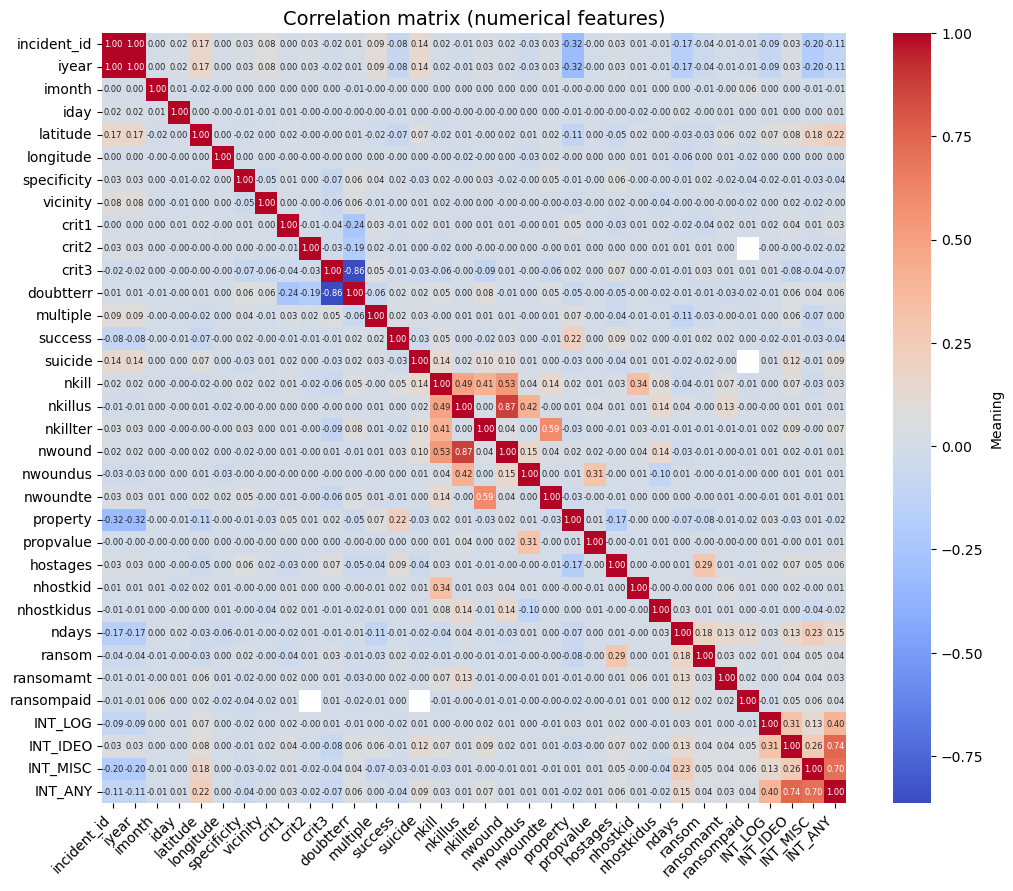

In [8]:
gtd.heatmap(correlation=True)

<Figure size 1000x600 with 0 Axes>

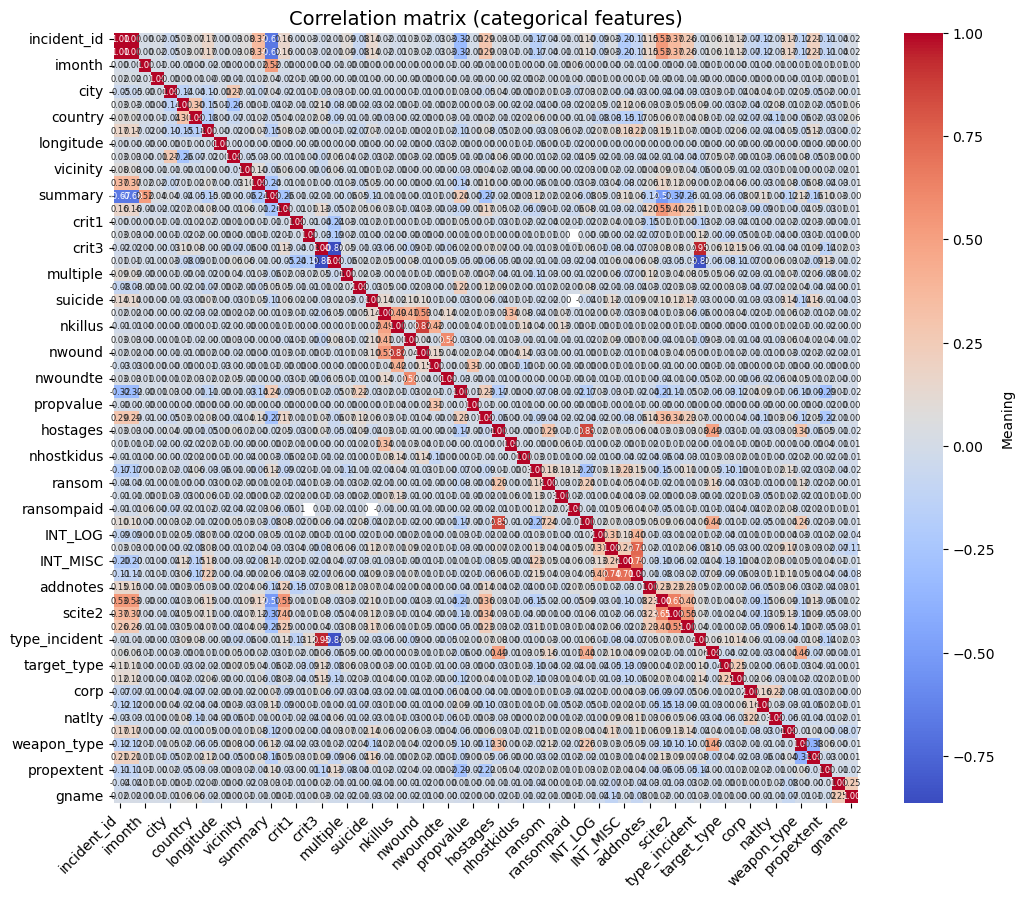

In [9]:
gtd.heatmap(correlation=True,categorical=True)

### Вывод:
Данные в целом имеют слабую корреляцию между собой за исключением неокторых групп данных:
- По жертвам
- По заложникам
- Интернациональные данные
Но с точки зрения анализа внутри групп инерес представлят наверное только заложники в резрезе запросов выкупа.
Поэтому скорее всего полезным анализом будет (с разбивкой до 2000 и после 2000):
- анализ террактов по годам (в разрезе доказанные/ не доказанные)
- анализ по странам (в резере кол-ва инцидентов)
- анализ по целям нападения (в резере кол-ва инцидентов)
- анализ по тер. орг. (в резере кол-ва инцидентов)
- анализ по жертвам (в резере кол-ва инцидентов)
- анализ по заложникам  (в резере кол-ва инцидентов)
- анализ по разрушениям (в резере кол-ва инцидентов)
- анализ по типам оружия (в резере кол-ва инцидентов)

 

## Анализ террактов по годам (в разрезе доказанные/ не доказанные)

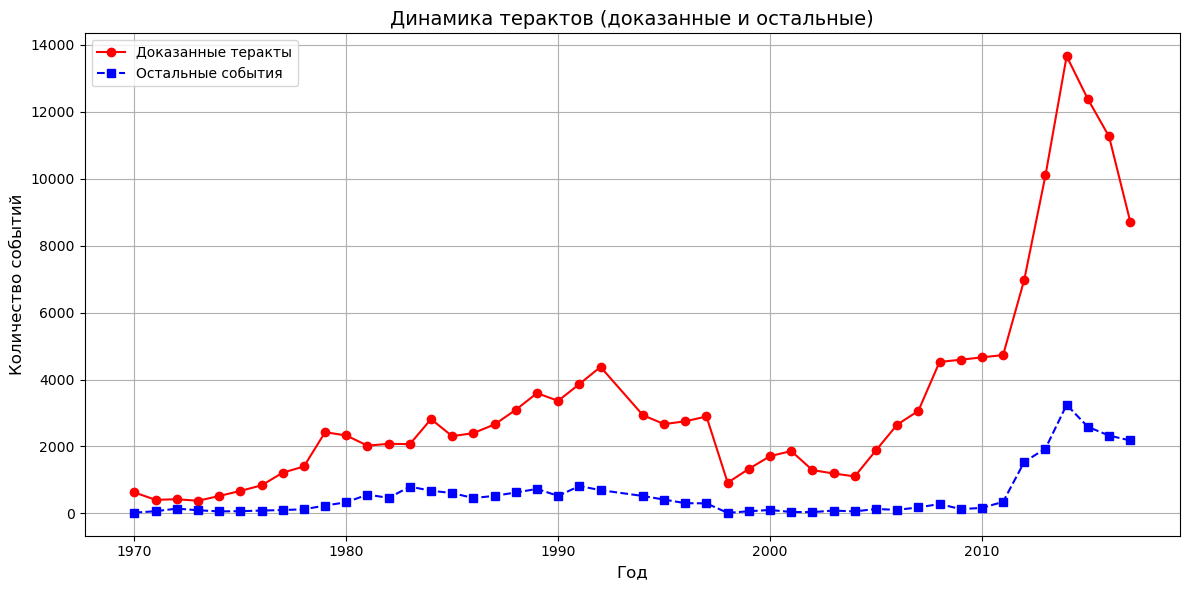

In [24]:
gtd.plot_attacks_year()

### Вывод: Наблюдается усточивый рост  до 1993 и резкий спад в 1994-1998. Затем сильный рост вплоть до 2014, а затем сильный спад.
Гипотезы спадов:
Спад террористической активности в 1994–1998 годах:

1. Северная Ирландия: Белфастское соглашение (Good Friday Agreement, 1998)
В 1997 году начались активные переговоры между Великобританией, Ирландией и политическими силами Северной Ирландии.
В апреле 1998 года был подписан Белфастский договор, что привело к значительному снижению атак со стороны Ирландской республиканской армии (IRA) и других группировок.
В 1997 году ИРА объявила перемирие, что могло снизить число атак в Европе.
2. Ближний Восток: Попытки мирных соглашений
Мирный процесс в Осло (1993–2000): В 1997–1998 годах между Израилем и Палестиной были попытки мирного урегулирования 
Йордания и Израиль: В 1994 году подписали мирный договор, что стабилизировало ситуацию в регионе.
3. Колумбия и Южная Америка: Переговоры с партизанами
В Колумбии в 1998 году начались переговоры между правительством и Революционными вооруженными силами Колумбии (FARC).
Это временно снизило количество атак со стороны FARC и других леворадикальных групп.
4. Россия и Чечня: Перемирие после Первой Чеченской войны (1996–1999)
В 1996 году подписано Хасавюртовское соглашение, остановившее Первую Чеченскую войну.
В 1997 году в Чечне прошли выборы, и до конца 1998 года боевые действия были менее активными.
В 1999 году началась Вторая Чеченская война, и количество атак снова выросло.
5. Финансовый кризис 1997 года (Азиатский кризис)
В 1997 году начался азиатский финансовый кризис, ударивший по экономике Юго-Восточной Азии.

Спад террористической активности после 2014.

Возможные причины:
1. Агрессия РФ против Украины (2014)
Конфликт отвлек внимание мирового сообщества и СМИ.
Многие страны начали активнее бороться с финансированием террористических групп.
Определённые группировки могли "заморозить" свою активность в ожидании дальнейшего развития геополитической ситуации.
2. В 2011 году ликвидирован Усама бен Ладен (Аль-Каида).
В 2015–2019 годах коалиция во главе с США активно уничтожала лидеров ИГИЛ 
После потерь в руководстве террористические организации часто дезорганизуются.
Изменение тактики террористов
3. Вместо больших терактов с множеством жертв (которые проще отследить) террористические группы могли перейти к локальным атакам.
4. После 2014 года цены на нефть резко упали → это ударило по финансированию террористических организаций, особенно тех, которые зависели от нефтяных доходов (например, ИГИЛ).
Усиление глобального антитеррористического контроля, в том числе в интернете и банковском секторе.



## Анализ по странам (в резере кол-ва инцидентов)

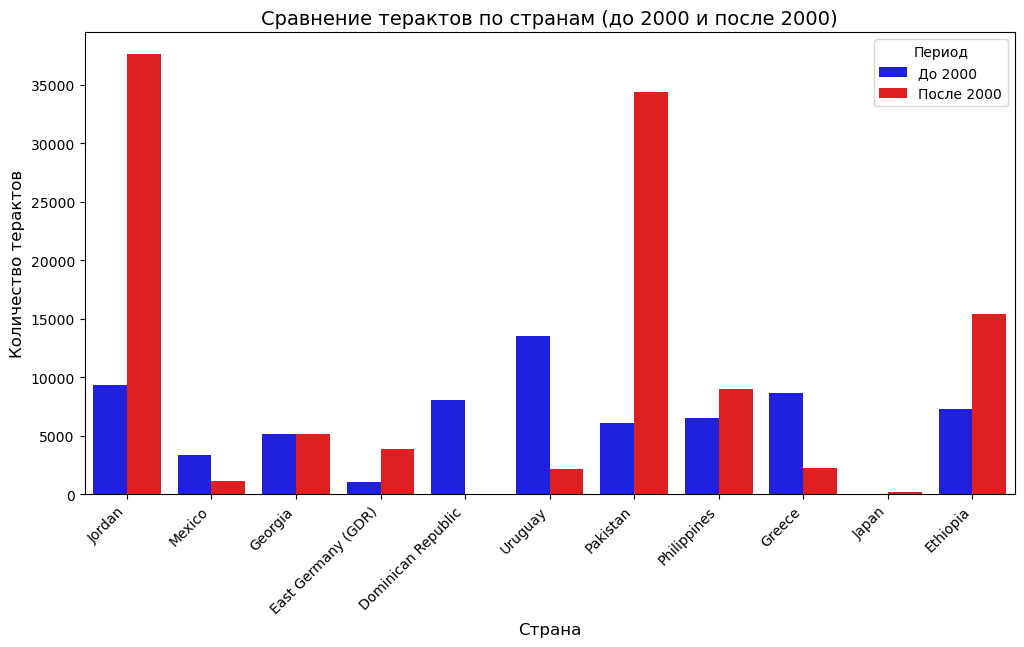

In [25]:
gtd.plot_attacks_by_country_grouped()

### Вывод:

Доминикана и Уругвай → заметное снижение. Это может говорить о стабилизации обстановки, улучшении безопасности или изменении политической ситуации.
Иордания, Пакистан, Эфиопия → резкий рост. Эти регионы действительно сталкивались с ростом конфликтов после 2000 года.
Филиппины, ГДР- небольшой рост 
Гиппотеза:
- Пакистан — после 2000-х усилилась активность террористических группировок, особенно после начала войны в Афганистане (2001).
- Иордания — геополитическая нестабильность из-за соседства с Ираком и Сирией.
- Эфиопия — внутренние конфликты, война в Тыграе, рост терроризма в Восточной Африке.
- Филиппины остаются одним из очагов террористической активности в Юго-Восточной Азии.(Маратский кризис (2017), конфликты на юге (Минданао)  )
- Германия испытывает двойное давление — как от исламского экстремизма, так и от локальных радикалов(теракт на рождественской ярмарке в Берлине (2016), левый и правый экстремизм)

## Анализ по тер. организациям (в резере кол-ва инцидентов)

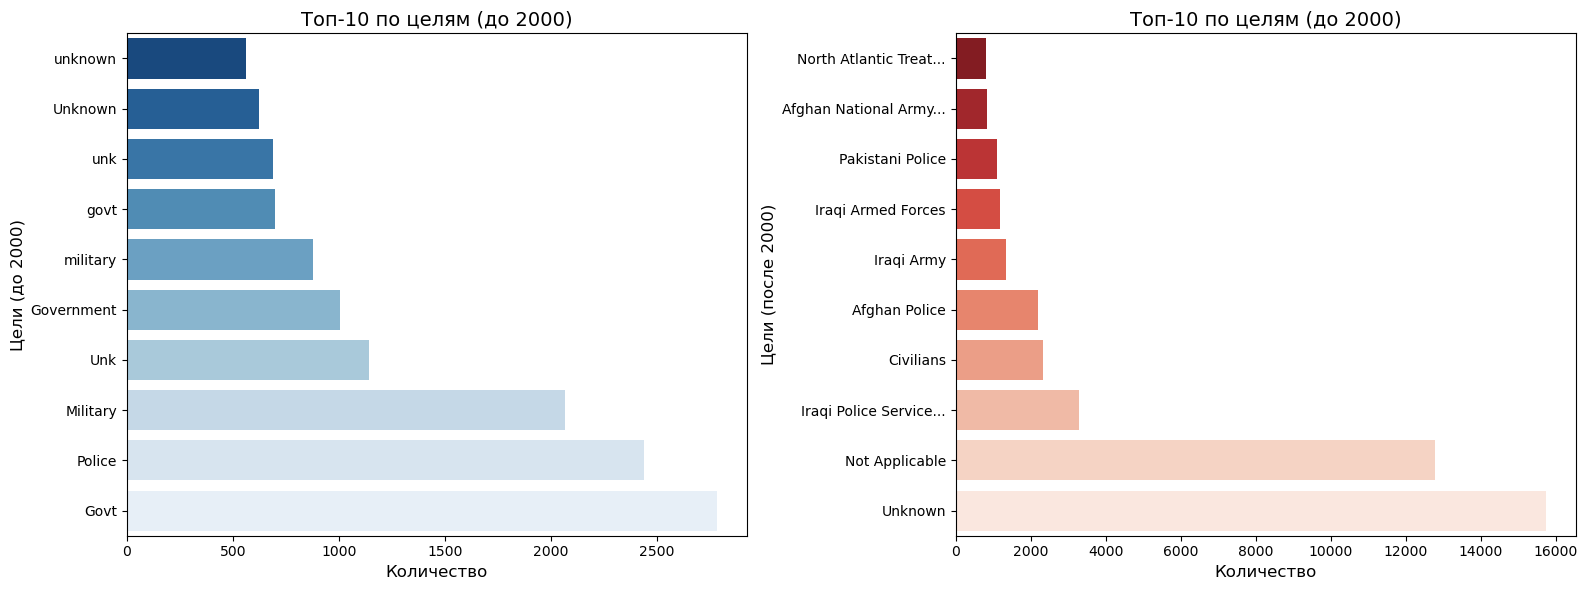

In [26]:
gtd.plot_attacks_by_corp1()

### Вывод:
До 2000 года конфликты часто имели организованный характер, связанные с государственными переворотами, военными конфликтами и внутренними вооружёнными столкновениями. В таких ситуациях основные цели террористических атак – правительство, военные и полиция – так как они были вовлечены в эти конфликты.

После 2000 года ситуация изменилась:

- Децентрализация терроризма – больше независимых группировок.
- Рост сетевых структур – появление террористических ячеек без централизованного управления (куча идеологических идиотов).
- Терроризм как способ давления – больше акций устрашения против гражданского населения, инфраструктуры, символических целей, а не прямых атак на государственные структуры.
- Сложность идентификации – многие атаки остаются без установленного исполнителя (отсюда рост "Unknown" и "Not Applicable").


## Анализ по тер. организациям (в резере кол-ва инцидентов)

Dev Sol                     44
Social Christian Par...     64
Kurdistan Workers' P...     79
United Popular Actio...    103
Naga People                106
Hezbollah                  116
Bodo Militants             120
Albanian extremists        169
Tutsi extremists           481
Farabundo Marti Nati...    526
Name: count, dtype: int64
gname
Palestinian Islamic Jihad (PIJ)                    60
Kurdistan Workers' Party (PKK)                     64
Al-Qaida in the Arabian Peninsula (AQAP)           77
Free Syrian Army                                   80
National Liberation Army of Colombia (ELN)         88
Communist Party of India - Maoist (CPI-Maoist)    123
Tehrik-i-Taliban Pakistan (TTP)                   225
Revolutionary Armed Forces of Colombia (FARC)     342
New People's Army (NPA)                           366
Islamic State of Iraq and the Levant (ISIL)       535
Name: count, dtype: int64


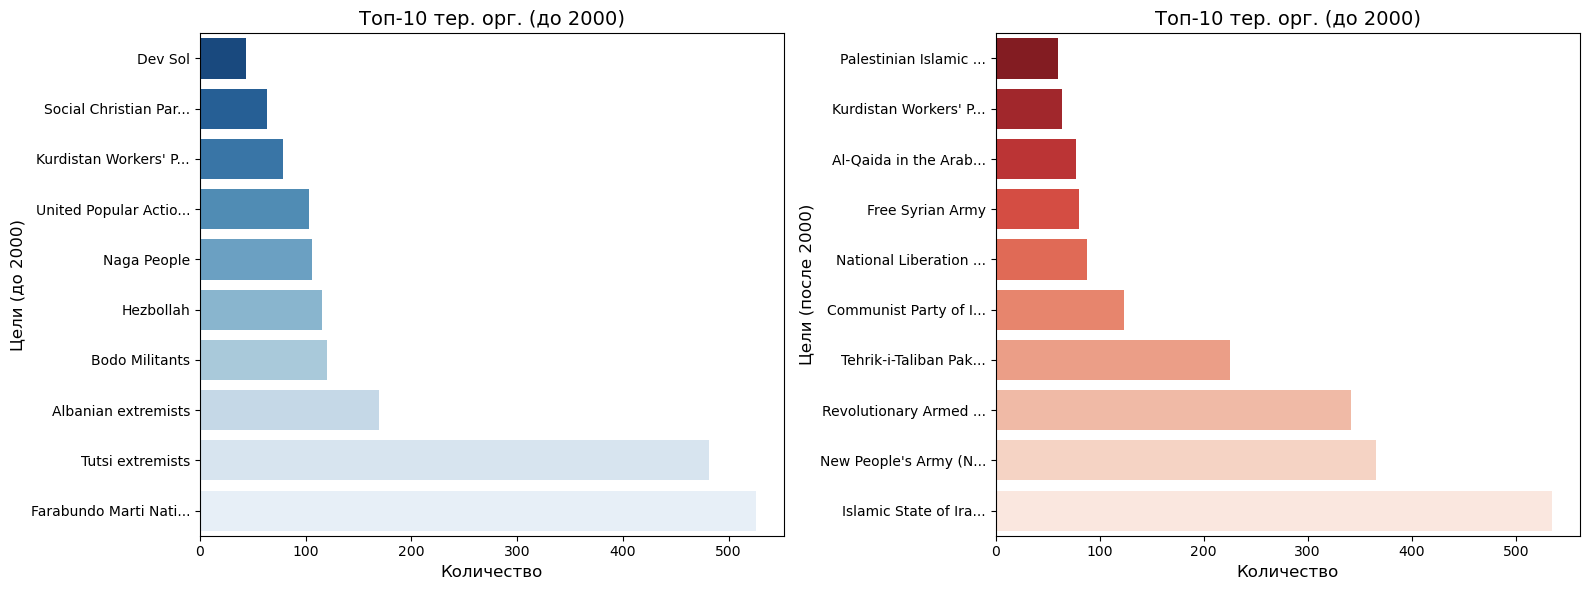

In [27]:
gtd.plot_attacks_by_gname()

### Выводы:
Судя по этим данным, идеологические и политические конфликты в регионах продолжаются, но сами организации со временем трансформируются. Некоторые распадаются, а на их месте появляются новые с похожими целями. Т.к кроме Kurdistan Workers' Party (PKK) все организации новые но почти все в тех же регионах.

Гипотезы:
- Конфликты не исчезают – несмотря на смену названий групп, коренные причины (политические, этнические, религиозные, социальные) остаются.
- Организации адаптируются – старые группы могут раскалываться, сливаться или менять названия, чтобы избежать санкций или преследований.
- Региональная преемственность – новые группы часто появляются там же, где действовали предыдущие, что подтверждает устойчивость конфликтов. 
А причинам изчезновения могут быть и самораспады и внешнее влияние (например военные операции, междунарождное влияние)


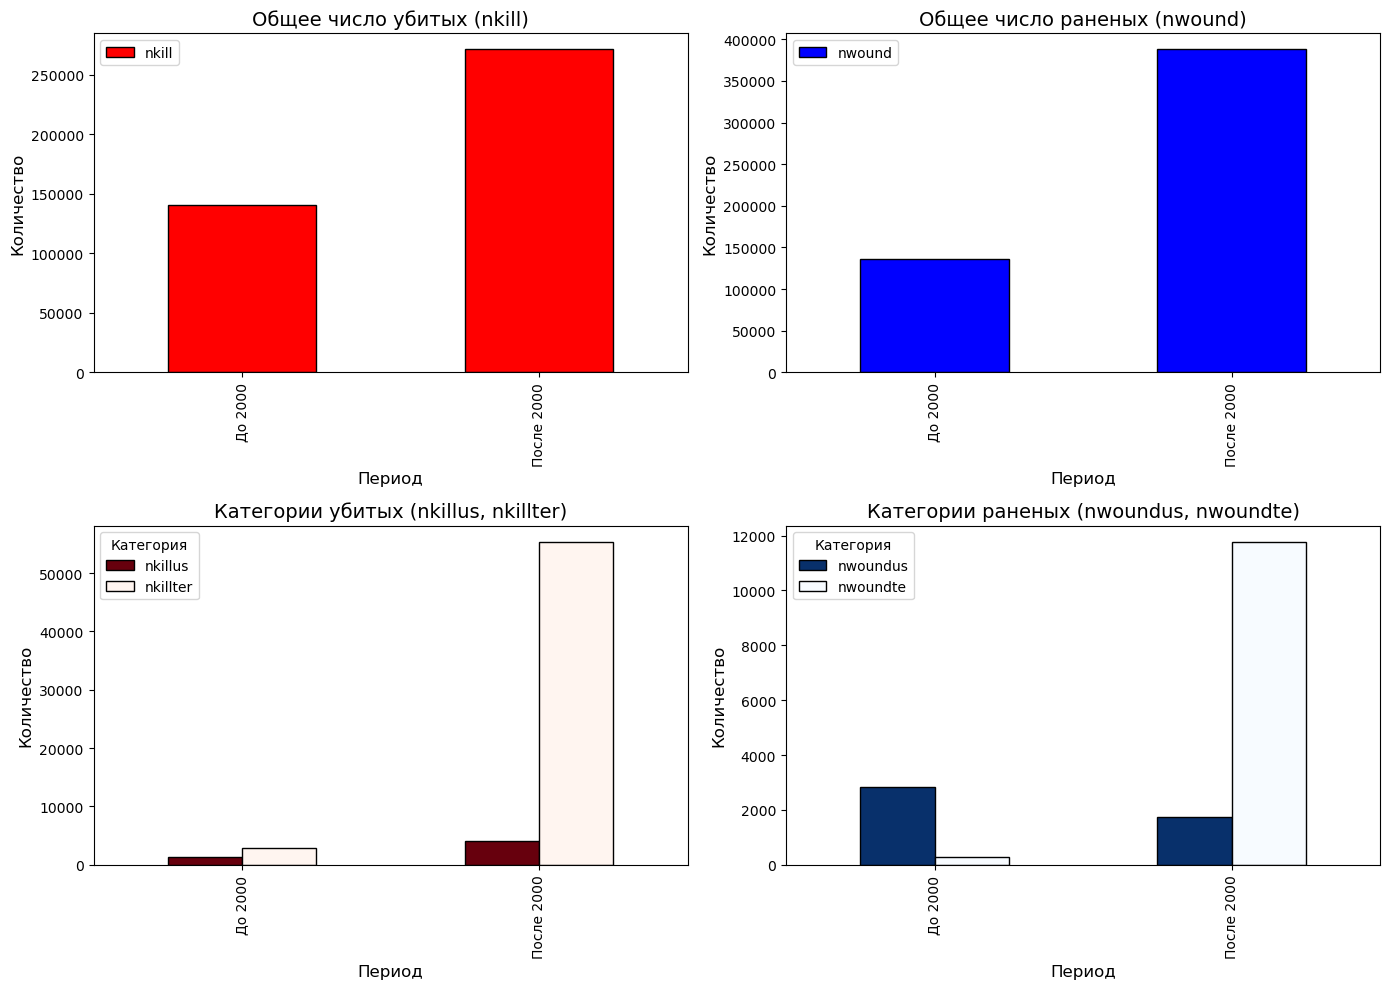

                            До 2000 года  После 2000 года
Среднее убитых (nkill)          2.204491         2.520838
Среднее убитых (nkillus)        0.229239         0.036561
Среднее убитых (nkillter)       0.536312         0.506652
Среднее раненых (nwound)        2.208373         3.735663
Среднее раненых (nwoundus)      0.497091         0.015595
Среднее раненых (nwoundte)      0.056841         0.109510


In [28]:
gtd.plot_kill_and_wound()

Разбор данных:
- Общее число убитых (nkill) выросло — с 2.20 до 2.52.
Гиппотеза: теракты стали более смертоносными.

- Число убитых американцев (nkillus) резко упало — с 0.23 до 0.036.
Гиппотеза: :
Либо американцы стали реже становиться жертвами терактов.
Либо атаки стали более точечными, а не массовыми.

- Число убитых террористов (nkillter) почти не изменилось — 0.53 до 0.50.
Гиппотеза:  либо террористы не стали чаще погибать, либо тактика ликвидации не изменилась.

- Общее число раненых (nwound) выросло в 1.7 раза — с 2.20 до 3.73.
Гиппотеза: Возможно, теракты стали направлены больше на массовое запугивание, чем на убийство.

- Число раненых американцев (nwoundus) резко упало — с 0.50 до 0.015.
Гиппотеза: Либо изменились цели атак, либо усилилась защита американцев.

Число раненых террористов (nwoundte) выросло — с 0.056 до 0.11.
Гиппотеза:Это может говорить о том, что террористов стало сложнее ликвидировать сразу, либо увеличилось число неудачных атак.

Вывод:
- После 2000 года теракты стали более смертоносными и массовыми.
- Раненых стало больше, что говорит о смене тактики — больше атак на толпы.
- Смертность среди террористов не изменилась, но их ранения увеличились.

### Вывод: К соажлению графики совместно с предыдущими данными (показывающих рост кол-ва террактов) свидетельствуют о том что чем больше террактов - тем больше жертв и больше раненых. Снижение наблюдается только в кол-ве раненых аммериканцев, что скорее всего свидетельствует о более лучшей защите от террактов

## Анализ по заложникам  (в резере кол-ва инцидентов)

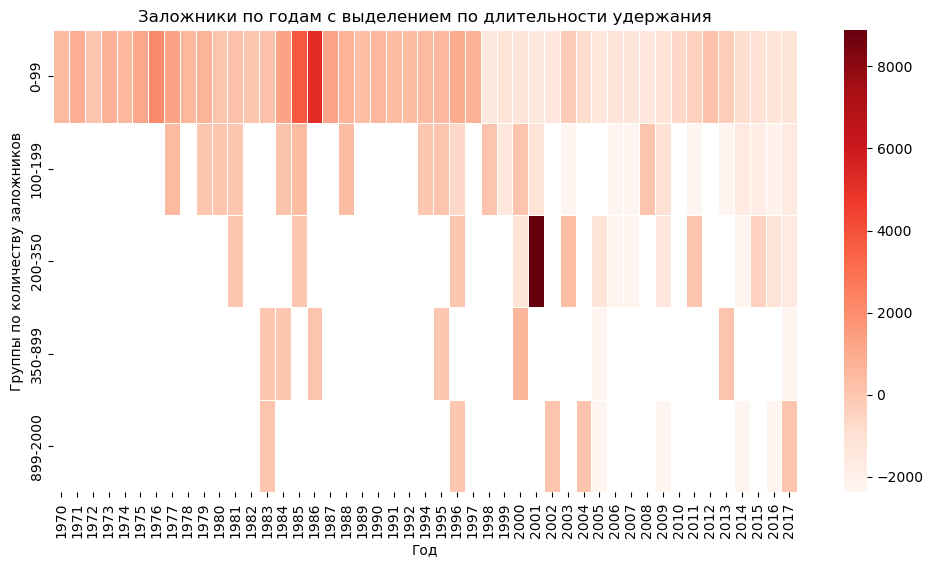

<Figure size 1200x600 with 0 Axes>

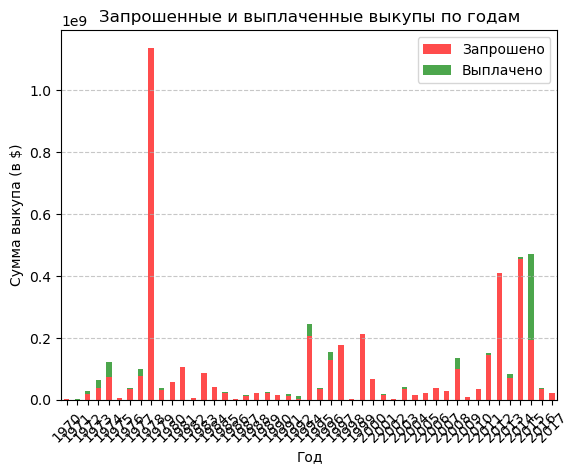

In [29]:
gtd.plot_hostage_and_ransom()

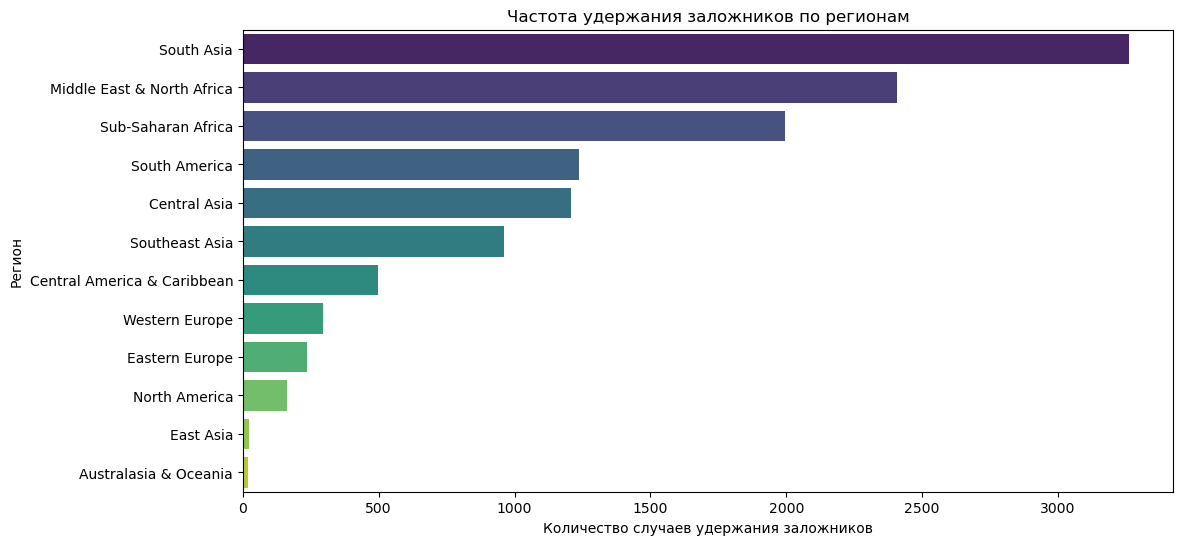

In [30]:
gtd.analyze_hostage_by_region()


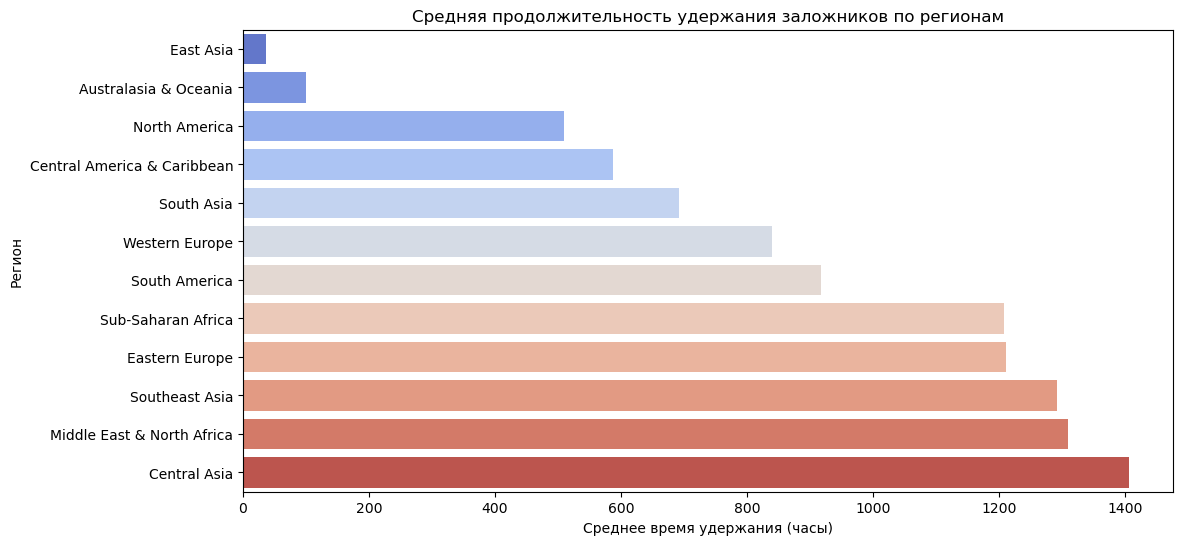

In [31]:
gtd.analyze_duration_by_region()



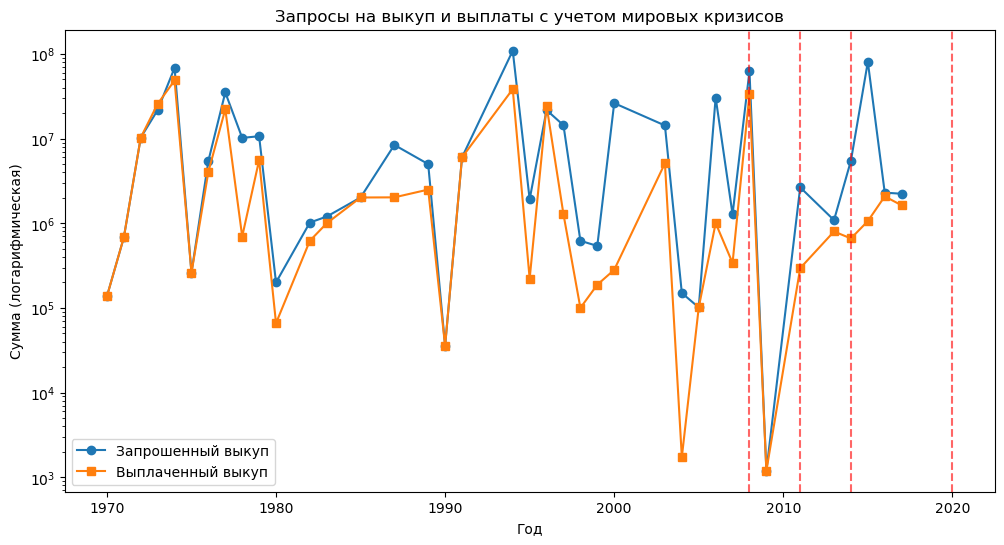

In [32]:
gtd.analyze_ransom_vs_crises()

### Вывод: По графикам можно предположить:
- Удержания заложников так же часты у террористов и же наблюдается некоторая тенденция к увеличению числа заложников. А вот время удержание скорее уменьшилось.
Гипотеза:
-Методы террористов не поменялись поэтому удержания заложников все также применяются. А снижение времнеи скорее вызванно более сложными при текущем техническом оснащении само удержание заложников или с усилением спецопераций. И более вероятно именно проведение спецопераций т.к что регионы с самым большим числом захвата заложников, и времению удержания - юго-восточная азия и африка, т.е большиие пространства, довольно много удаленных от "цивилизации" мест, где захват заложников организовать легче.
Запросы на выкуп без учета аномальных данных выглядят "пилообразно", что скорее всего связано с изменением ситуации в регионах. Выплаты же по запросам носят вообще единичный характер. И по графику заивисмости от кризисов (по годам ) видно в момент кризисов 2008, 2011, 2014 наблюдается рост запросов выкупов.

## Анализ по использованному оружию  (в резере кол-ва инцидентов)

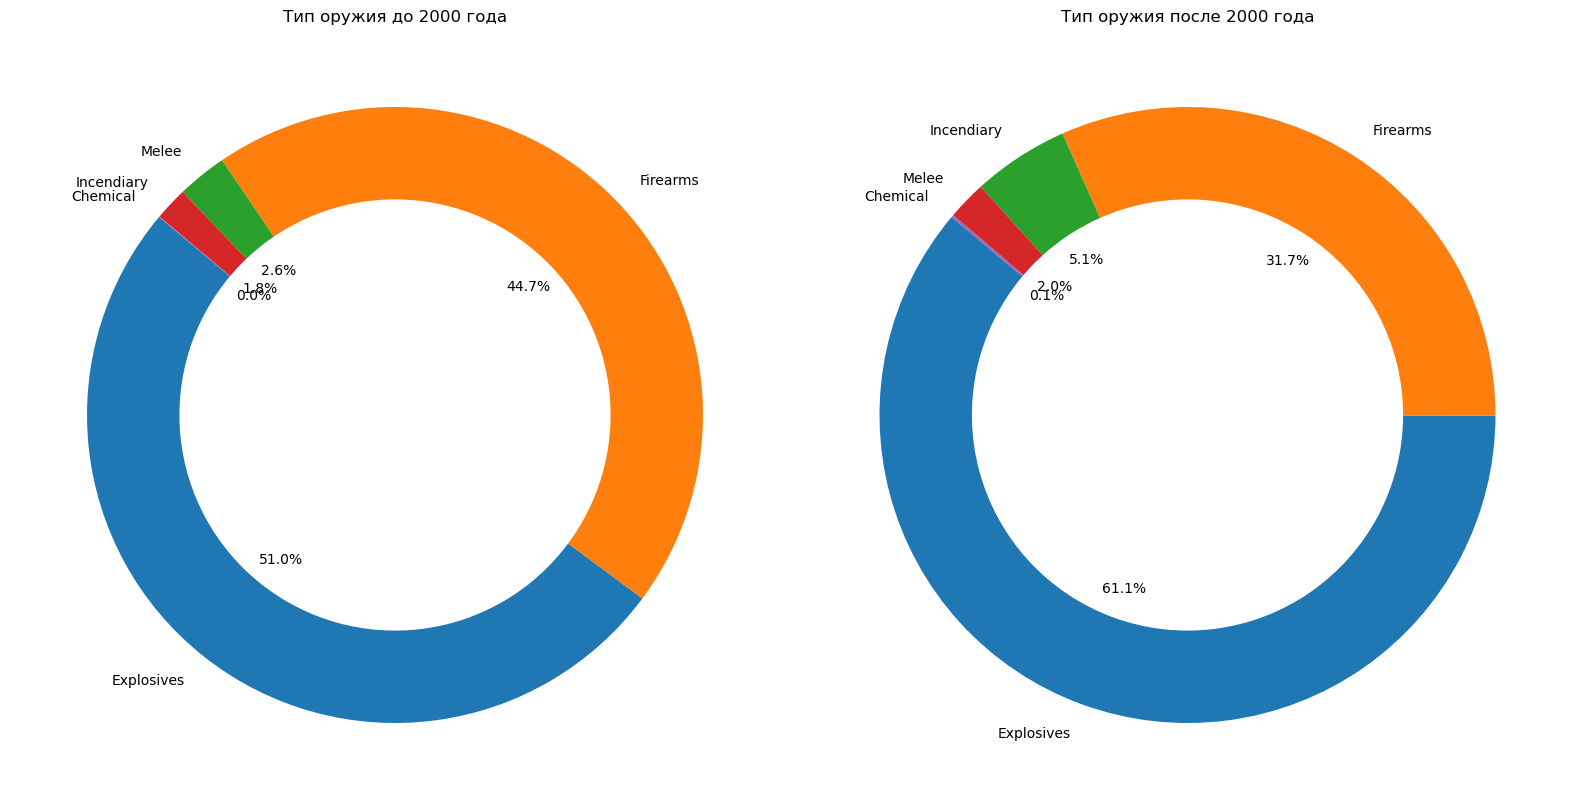

In [33]:
gtd.plot_weapon_donut("weapon_type", "Тип оружия")


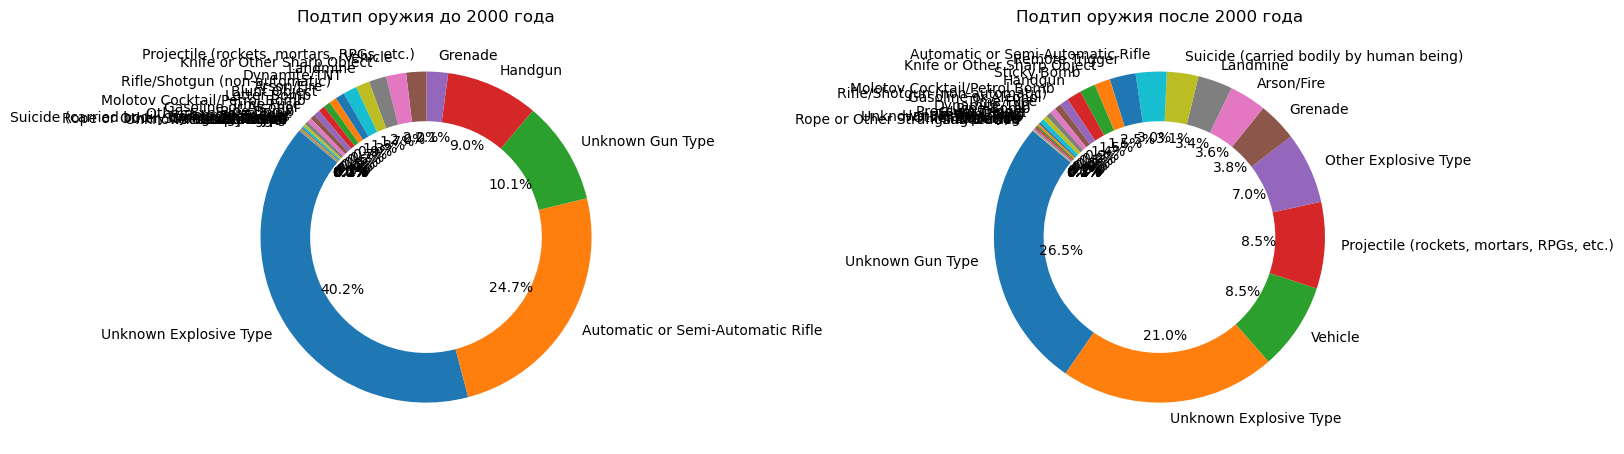

In [34]:
gtd.plot_weapon_donut("weapon_sub_type", "Подтип оружия")

### Вывод. Исходя из графиок мможно сделать вывод, что после 2000 уменьшилось число террактов с автоматическим оружием зато существенно увеличилось кол-во и разновидности взрывчатого оружия. Что подтверждает выводы о увеличении числа погибших в террактах после 2000.

# Функции для проверрки гиппотез

In [49]:
import numpy as np
from scipy.stats import norm
from scipy.stats import chi2_contingency

def z_test(sample1, sample2, alpha=0.05):
    """ Функция для проверки гипотезы с помощью Z-критерия """

    # Вычисляем параметры выборок
    mean1, mean2 = np.mean(sample1), np.mean(sample2)
    var1, var2 = np.var(sample1, ddof=1), np.var(sample2, ddof=1)
    n1, n2 = len(sample1), len(sample2)

    # Вычисляем Z-статистику
    z_stat = (mean1 - mean2) / np.sqrt(var1/n1 + var2/n2)

    # Вычисляем p-value (двусторонний тест)
    p_value = 2 * (1 - norm.cdf(abs(z_stat)))

   
    return z_stat, p_value

def t_test_manual(sample1, sample2, alpha=0.05):
    """Функция для проверки гипотезы с помощью t-теста (ручной расчет)"""
    
    # Вычисляем параметры выборок
    mean1, mean2 = np.mean(sample1), np.mean(sample2)
    var1, var2 = np.var(sample1, ddof=1), np.var(sample2, ddof=1)
    n1, n2 = len(sample1), len(sample2)

    # Объединённая дисперсия
    sp2 = ((n1 - 1) * var1 + (n2 - 1) * var2) / (n1 + n2 - 2)

    # t-статистика
    t_stat = (mean1 - mean2) / np.sqrt(sp2 * (1/n1 + 1/n2))

    # Степени свободы
    df = n1 + n2 - 2

    # p-value (двусторонний тест)
    p_value = 2 * (1 - stats.t.cdf(abs(t_stat), df))

    # Вывод результатов
    print(f"T-статистика: {t_stat:.3f}, p-value: {p_value:.5f}")

    if p_value < alpha:
        print("Отвергаем H0: Средние значения различаются.")
    else:
        print("Нет оснований отвергнуть H0: Разница незначима.")

    return t_stat, p_value

def manual_chi2_test(contingency_table):
    observed = contingency_table  # Наблюдаемые значения
    row_sums = observed.sum(axis=1).reshape(-1, 1)  # Суммы по строкам
    col_sums = observed.sum(axis=0).reshape(1, -1)  # Суммы по столбцам
    total = observed.sum()  # Общая сумма

    expected = (row_sums @ col_sums) / total  # Ожидаемые значения

    chi2_manual = ((observed - expected) ** 2 / expected).sum()  # Формула хи-квадрат
    return chi2_manual

# Проверка гиппотез

## Общая цель: Проверка увеличилось ли среднее число жертв в 2007 году по сравнению с 2006 годом.

Определяем гипотезы

- H0 Среднее число жертв в 2007 году такое же, как в 2006.
- H1 Среднее число жертв в 2007 году изменилось.

In [44]:
# Делим на две группы

df = gtd.df.copy()


victims_2006 = df[df["iyear"] == 2006]["nkill"]
victims_2007 = df[df["iyear"] == 2007]["nkill"]

victims_2006 = victims_2006.dropna()
victims_2007 = victims_2007.dropna()

# Выполняем t-тест
t_stat, p_value = stats.ttest_ind(victims_2006, victims_2007)

print(f"T-статистика: {t_stat:.3f}, p-value: {p_value:.5f}")

if p_value < 0.05:
    print("Отвергаем H0: Число жертв изменилось в 2007 году.")
else:
    print("Нет оснований отвергнуть H0: Разница незначима.")

# Проверка гипотезы с помощью z-критерия
z_stat, p_value_z = z_test(victims_2006, victims_2007)

# Вывод результатов
print(f"Ручная Z-статистика: {z_stat:.3f}, p-value: {p_value:.5f}")

# Проверяем значимость
if p_value < 0.05:
    print("Отвергаем H0: Число жертв изменилось в 2007 году.")
else:
    print("Нет оснований отвергнуть H0: Разница незначима.")

# Проверка гипотезы с помощью ручной t-функции
z_stat_man, p_value_z_man = z_test(victims_2006, victims_2007)

# Вывод результатов
print(f"Ручная t-статистика: {z_stat_man:.3f}, p-p_value_z_man: {p_value_z_man:.5f}")
# Проверяем значимость
if p_value_z_man < 0.05:
    print("Отвергаем H0: Число жертв изменилось в 2007 году.")
else:
    print("Нет оснований отвергнуть H0: Разница незначима.")


T-статистика: -1.699, p-value: 0.08934
Нет оснований отвергнуть H0: Разница незначима.
Ручная Z-статистика: -1.725, p-value: 0.08934
Нет оснований отвергнуть H0: Разница незначима.
Ручная t-статистика: -1.725, p-p_value_z_man: 0.08449
Нет оснований отвергнуть H0: Разница незначима.


## Общая цель: Проверка увеличилось ли среднее число жертв в 2007 году по сравнению с 2006 годом.

H0  Распределение типов оружия в 1995 году такое же, как и в 2007 году.
H1  Распределение типов оружия отличается между этими годами.

In [50]:
# Фильтруем по годам
df_1995 = df[df['iyear'] == 1995]
df_2007 = df[df['iyear'] == 2007]


# Группируем по типу оружия и считаем количество случаев
weapon_1995 = df_1995['weapon_type'].value_counts()
weapon_2007 = df_2007['weapon_type'].value_counts()

# Объединяем в одну таблицу (заполняем пропущенные значения 0)
weapon_table = pd.DataFrame({'1995': weapon_1995, '2007': weapon_2007}).fillna(0)

# Делаем таблицу чисел (без индексов)
contingency_table = weapon_table.to_numpy()

# Применяем хи-квадрат тест
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Вывод результатов
print(f"Хи-квадрат статистика: {chi2:.3f}")
print(f"p-value: {p:.5f}")
print(f"Степени свободы: {dof}")

# Интерпретация
if p < 0.05:
    print("ОТКЛОНЯЕМ H0: распределение типов оружия изменилось.")
else:
    print("НЕ отклоняем H0: распределение осталось примерно таким же.")

chi2_manual = manual_chi2_test(contingency_table)
print(f"Ручной расчет хи-квадрат: {chi2_manual:.3f}")

Хи-квадрат статистика: 334.478
p-value: 0.00000
Степени свободы: 4
ОТКЛОНЯЕМ H0: распределение типов оружия изменилось.
Ручной расчет хи-квадрат: 334.478


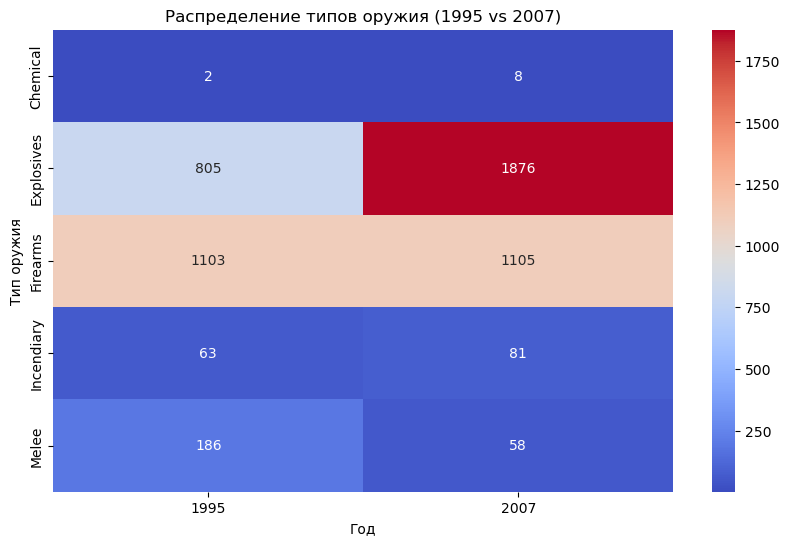

In [51]:
# Построим тепловую карту
plt.figure(figsize=(10, 6))
sns.heatmap(weapon_table, annot=True, cmap="coolwarm", fmt=".0f")

plt.title("Распределение типов оружия (1995 vs 2007)")
plt.xlabel("Год")
plt.ylabel("Тип оружия")
plt.show()